# House Price Prediction Assignment

## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. 

## Business Goal:

The company wants:
- To identify the variables that are significant in predicting the price of a house
- To identify how well those variables describe the price of a house.

In this way the company will be able to understand the prospective properties to buy so that it can enter the market.This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Analytical Goal:

1.  To build a regression model and check which important are important in determining the price.
2.  To check linearity of the data and if it is non-linear, use polynomial, lasso and ridge regression to build the model.
3.  To obtain the optimal values of beta through lasso and ridge regression.

## Step 1: Reading and Understanding the data:

Here we import all the libraries essential in reading the data and performing our analysis.

In [202]:
'''Importing required libraries'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

warnings.filterwarnings('ignore')

In [203]:
# Reading data
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [204]:
house.shape

(1460, 81)

In [205]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [206]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Data Cleaning:

### Removing columns having high percentage (>60%) of null values:

In [207]:
print("The columns having null values as shown below (in %):")
more_nas=round((house.isnull().sum()/len(house))*100, 2)
temp=more_nas[more_nas > 0.00].sort_values(ascending = False)
temp.nlargest(80)

The columns having null values as shown below (in %):


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageFinish     5.55
GarageCond       5.55
GarageQual       5.55
GarageYrBlt      5.55
GarageType       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [208]:
print("Shape after removing the null valued columns:")
house=house[house.columns[more_nas < 60.00]]
print(house.shape)

Shape after removing the null valued columns:
(1460, 77)


### Removing the Id and MoSold column as it is not useful for analysis

In [209]:
house = house.drop(columns=['Id','MoSold'],axis=1)

In [210]:
house.shape

(1460, 75)

### Removing columns having >=85% of null values:

In [211]:
house = house[(house.isnull().sum(axis=1)/len(house.columns)) < 85.0 ]
house.shape

(1460, 75)

### Missing values Imputation
In the below output, we can see few variables having missing values, so we will impute them with some considered values.

In [212]:
with pd.option_context('display.max_rows', None,):
    print(house.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

LotFrontage is a continuous variable and from the graph below we can observe that it is having outliers.

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

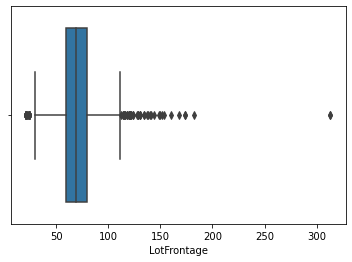

In [213]:
sns.boxplot(house.LotFrontage)
house.LotFrontage.describe()

In [214]:
house.LotFrontage.fillna(house.LotFrontage.median(), inplace = True)

We are imputing the missing values with the median since outliers are present.

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

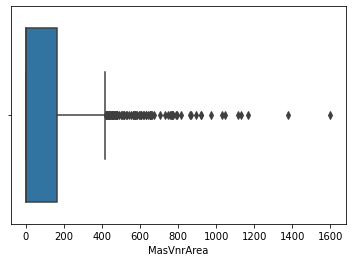

In [215]:
sns.boxplot(house['MasVnrArea'])
house['MasVnrArea'].describe()

There are very high outliers in the 'MasVnrArea' column, we will impute the rows having no data with median.

In [216]:
house.MasVnrArea.fillna(house.MasVnrArea.median(), inplace = True)

For categorical variables, we will replace missing values with the mode of those variables.

In [217]:
col=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType']
house[col]=house[col].fillna(house.mode().iloc[0])

In [218]:
house.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Since FireplaceQu is having high number of columns with Null values (more than value_count of mode), we will impute with 'None'

In [219]:
house.FireplaceQu.fillna('None', inplace = True)

<AxesSubplot:xlabel='GarageYrBlt'>

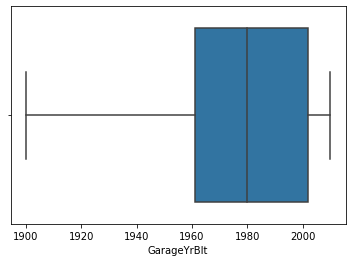

In [220]:
house.GarageYrBlt.describe()
sns.boxplot(house['GarageYrBlt'])

We can observe from the above diagram that the median lies in the year 1980. We will create new column 'GarageAge' and keep the value 'No Garage' for the missing values in GarageYrBlt , 'New' for garages built on or after 1980 and 'Old' for garages built before 1980.

In [221]:
house.GarageYrBlt.fillna(0, inplace = True)
    
def getGarageNewOrOld(row):
    if row == 0:
        return 'No Garage'
    elif row >= 1980:        
        return 'New'
    elif row < 1980:   
        return 'Old'
    
house['GarageAge'] = house['GarageYrBlt'].apply(getGarageNewOrOld)
house.head()     
    

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,GarageAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2008,WD,Normal,208500,New
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,2007,WD,Normal,181500,Old
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2008,WD,Normal,223500,New
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2006,WD,Abnorml,140000,New
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,2008,WD,Normal,250000,New


### Removing columns having same value >=90% times:

In [222]:
drop_col = []
for col in house.columns:
    if ((house[col].value_counts().max()/len(house))*100) >= 90.0:
        drop_col.append(col)
print(drop_col)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [223]:
house = house.drop(drop_col,axis=1)

### Removing duplicate rows:

In [224]:
duplicate = house[house.duplicated()]
duplicate

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,SaleType,SaleCondition,SalePrice,GarageAge


From above output, we can see no duplicate rows are present.

### Replacing numeric values in categorical variables:

We need to first map actual values in 'MSSubClass' as it is having numeric values and is at the risk of being treated like a numeric variable.

In [225]:
val = {20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
 }
house['MSSubClass']=house['MSSubClass'].map(val)
house['MSSubClass']

0                                    2-STORY 1946 & NEWER
1                         1-STORY 1946 & NEWER ALL STYLES
2                                    2-STORY 1946 & NEWER
3                                    2-STORY 1945 & OLDER
4                                    2-STORY 1946 & NEWER
5                           1-1/2 STORY FINISHED ALL AGES
6                         1-STORY 1946 & NEWER ALL STYLES
7                                    2-STORY 1946 & NEWER
8                           1-1/2 STORY FINISHED ALL AGES
9               2 FAMILY CONVERSION - ALL STYLES AND AGES
10                        1-STORY 1946 & NEWER ALL STYLES
11                                   2-STORY 1946 & NEWER
12                        1-STORY 1946 & NEWER ALL STYLES
13                        1-STORY 1946 & NEWER ALL STYLES
14                        1-STORY 1946 & NEWER ALL STYLES
15                      1-1/2 STORY - UNFINISHED ALL AGES
16                        1-STORY 1946 & NEWER ALL STYLES
17            

We need to first map actual values in 'OverallQual' and 'OverallCond' as it is having numeric values and is at the risk of being treated like a numeric variable.

In [226]:
values = {10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'
	  }
house['OverallQual']=house['OverallQual'].map(values)
house['OverallQual']

0                 Good
1        Above Average
2                 Good
3                 Good
4            Very Good
5              Average
6            Very Good
7                 Good
8                 Good
9              Average
10             Average
11           Excellent
12             Average
13                Good
14       Above Average
15                Good
16       Above Average
17       Below Average
18             Average
19             Average
20           Very Good
21                Good
22           Very Good
23             Average
24             Average
25           Very Good
26             Average
27           Very Good
28             Average
29       Below Average
30       Below Average
31             Average
32           Very Good
33             Average
34           Excellent
35           Very Good
36             Average
37             Average
38             Average
39       Below Average
40       Above Average
41             Average
42             Average
43         

In [227]:
house['OverallCond']=house['OverallCond'].map(values)
house['OverallCond']

0             Average
1           Very Good
2             Average
3             Average
4             Average
5             Average
6             Average
7       Above Average
8             Average
9       Above Average
10            Average
11            Average
12      Above Average
13            Average
14            Average
15          Very Good
16               Good
17            Average
18            Average
19      Above Average
20            Average
21               Good
22            Average
23               Good
24          Very Good
25            Average
26               Good
27            Average
28      Above Average
29      Above Average
30      Below Average
31      Above Average
32            Average
33            Average
34            Average
35            Average
36            Average
37      Above Average
38               Good
39            Average
40            Average
41      Above Average
42               Good
43      Above Average
44      Above Average
45        

### Derived Columns:

We derive the column 'HouseAge' which is the difference between Year Sold and Year Built

In [228]:
house['HouseAge'] =  house.YrSold - house.YearBuilt 

In [229]:
house['HouseAge'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: HouseAge, dtype: float64

We derive the column 'YearRemodAge' which is the difference between Year house was remodelled and Year Built

In [230]:
house['RemodelAge'] = house['YearRemodAdd'] - house['YearBuilt']

In [231]:
house['RemodelAge'].describe()

count    1460.000000
mean       13.597945
std        24.476465
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       123.000000
Name: RemodelAge, dtype: float64

Since we have already derived the information from columns 'YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt', so we are dropping them.

In [232]:
house.drop(columns=['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'],inplace=True)

In [233]:
house.shape

(1460, 54)

### List of Continuous and Categorical Features:

In [234]:
# List of categorical features
category = house.select_dtypes(include='object').columns
category

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition', 'GarageAge'],
      dtype='object')

In [235]:
# List of Continuous features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

house.select_dtypes(include=numerics).columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SalePrice', 'HouseAge', 'RemodelAge'],
      dtype='object')

### Removal of Outliers:

We first check the boxplots of all the numerical features to check the presence of outliers. We need to remove the outliers as otherwise, our model will become unstable.

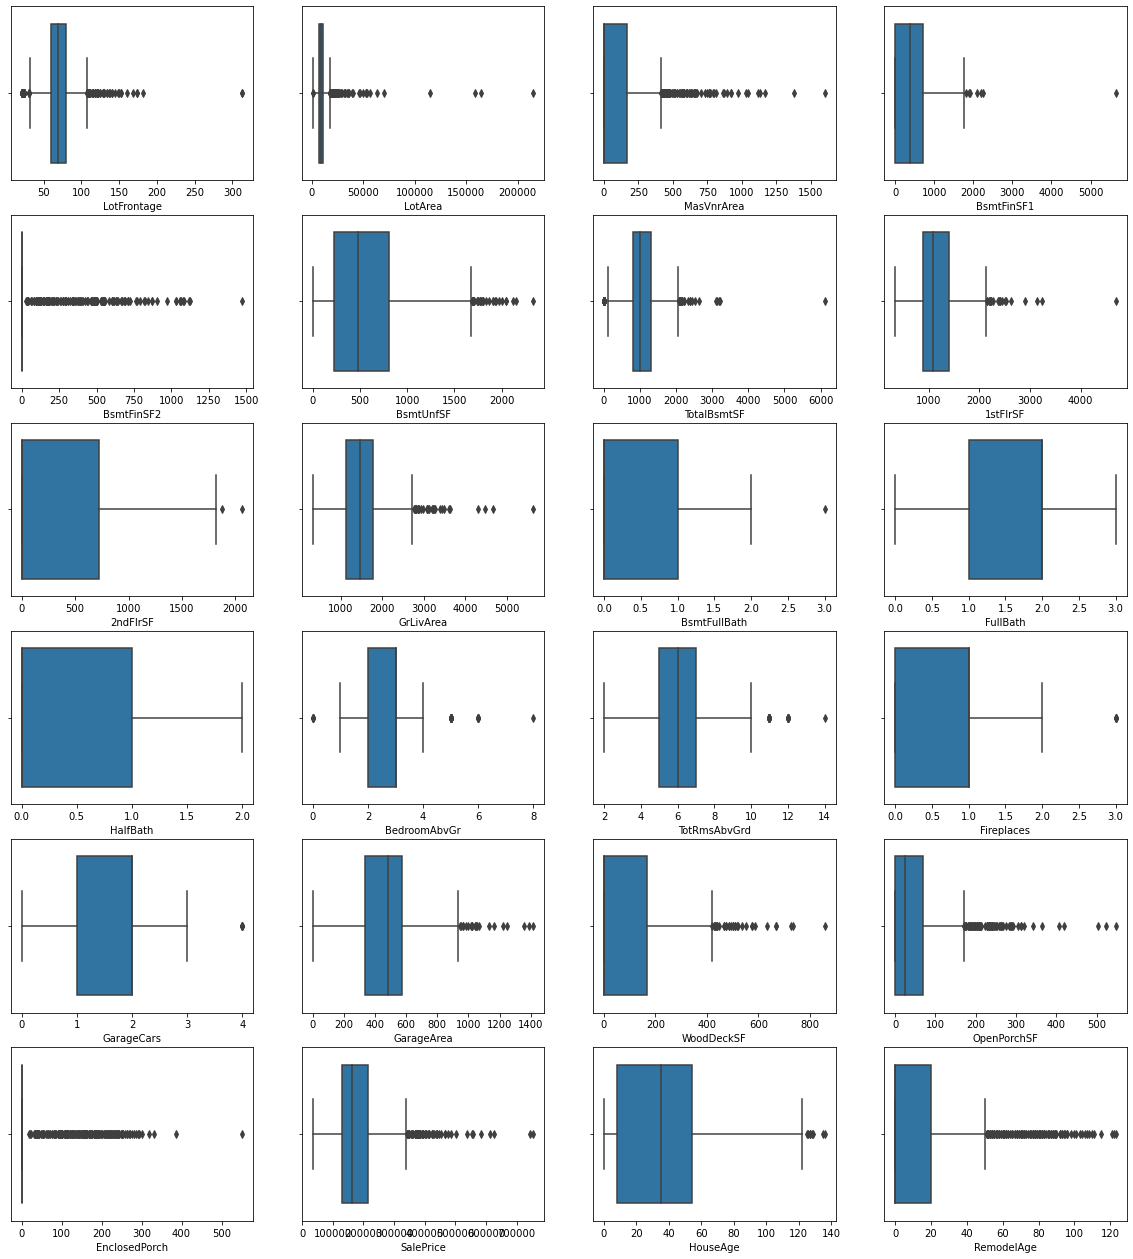

In [236]:
cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SalePrice', 'HouseAge', 'RemodelAge']
plt.figure(figsize=(20,30))
for i in enumerate(cols):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=house)


We are removing all the values outside the range of  ( Q1 - 1.5 * IQR ) and ( Q3 + 1.5 * IQR).

In [237]:
Q1=house[cols].quantile(0.05)
Q3=house[cols].quantile(0.95)
IQR=Q3-Q1
house=house[~((house[cols] < ( Q1 - 1.5 * IQR )) | (house[cols] > ( Q3 + 1.5 * IQR))).any(axis=1)]

In [238]:
house.shape

(1425, 54)

After all the data cleaning, (1424,54) is the final shape.

## Step 3: Data Visualisation:

### Visualising Target Column:

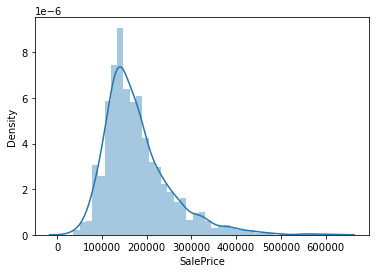

In [239]:
#Sale Column
plt.figure()
sns.distplot(house['SalePrice'])
plt.show()

#### Observation:
We can observe the SalePrice is normally distributed with its maximum value lying somewhere between 100000 and 200000.

### Visualising Continuous Variables:

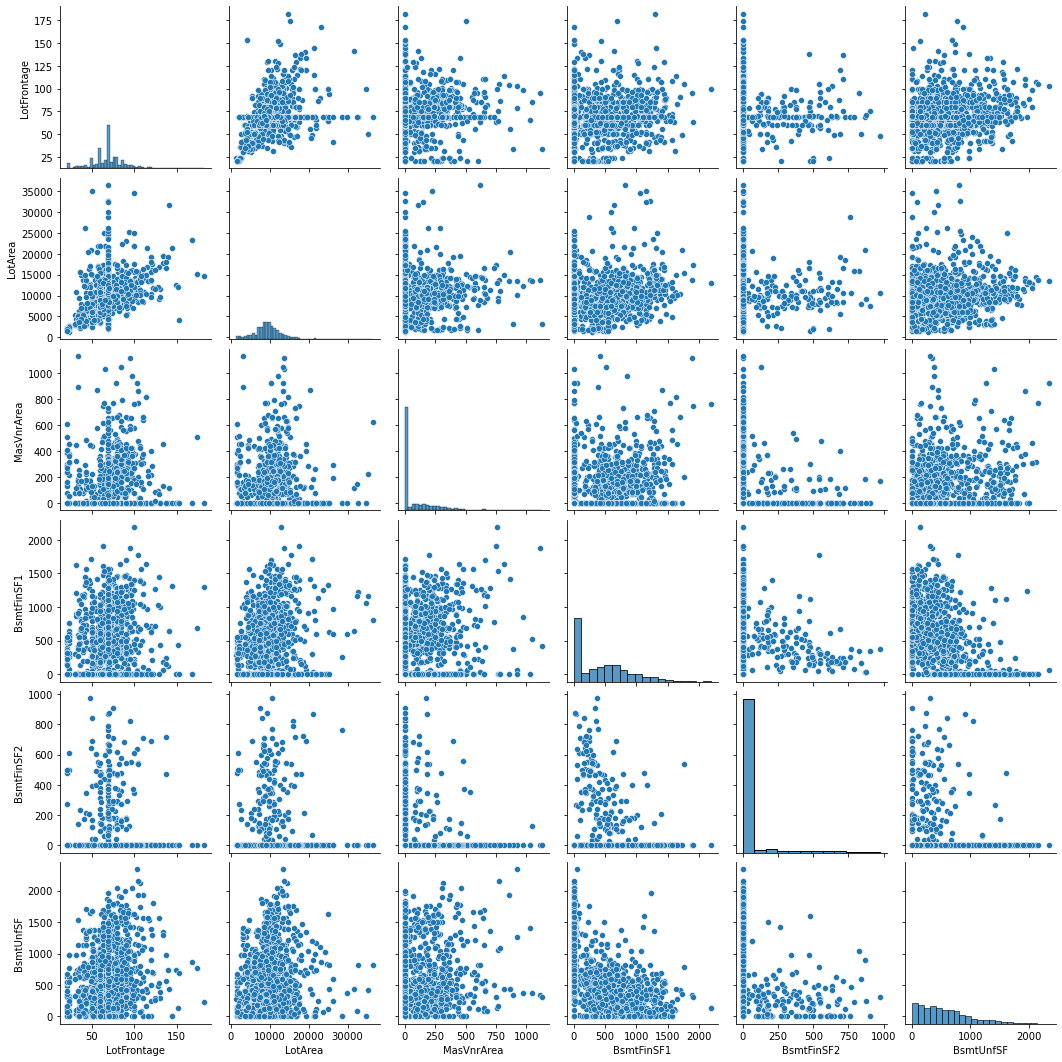

In [240]:
# Visualising Continuous variables
sns.pairplot(house[cols[0:6]])
plt.show()

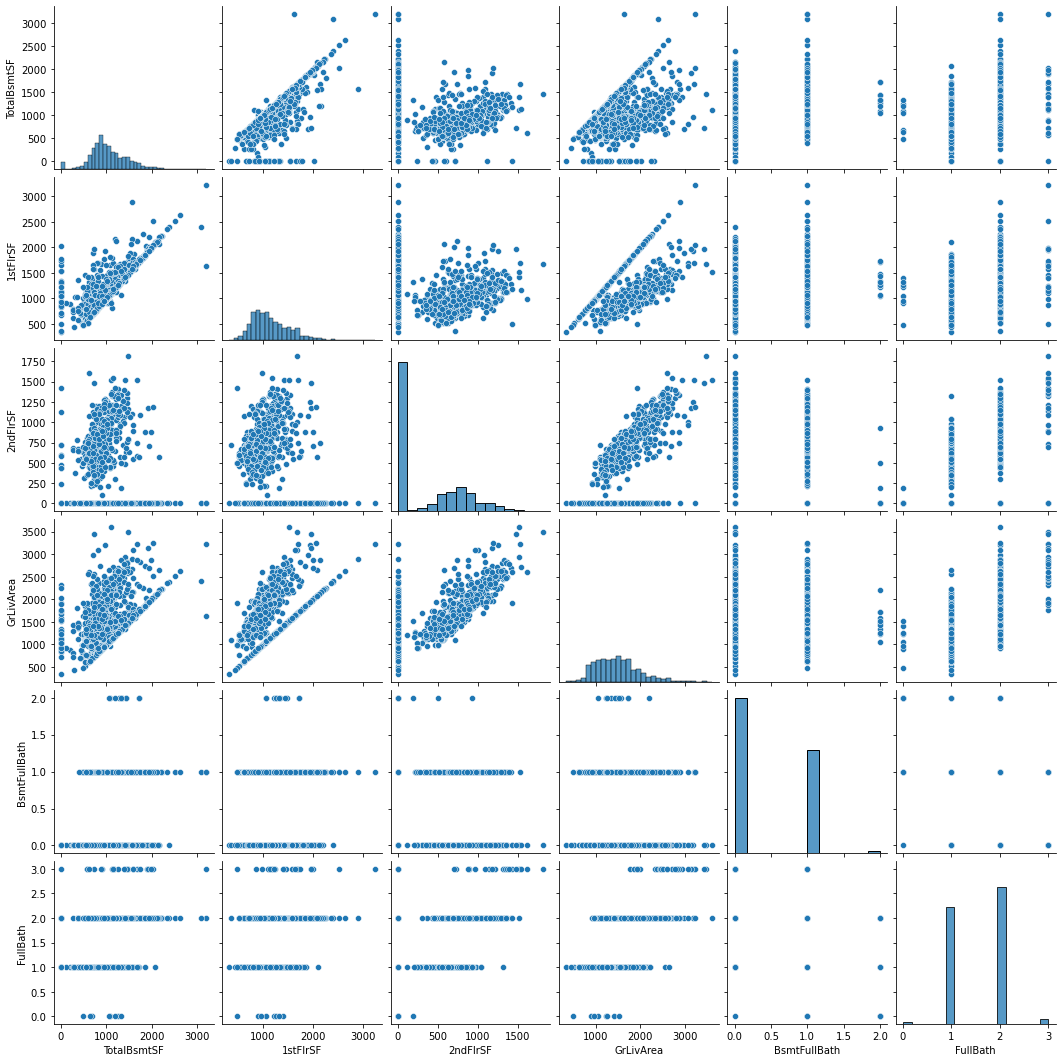

In [241]:
# Visualising Continuous variables
sns.pairplot(house[cols[6:12]])
plt.show()

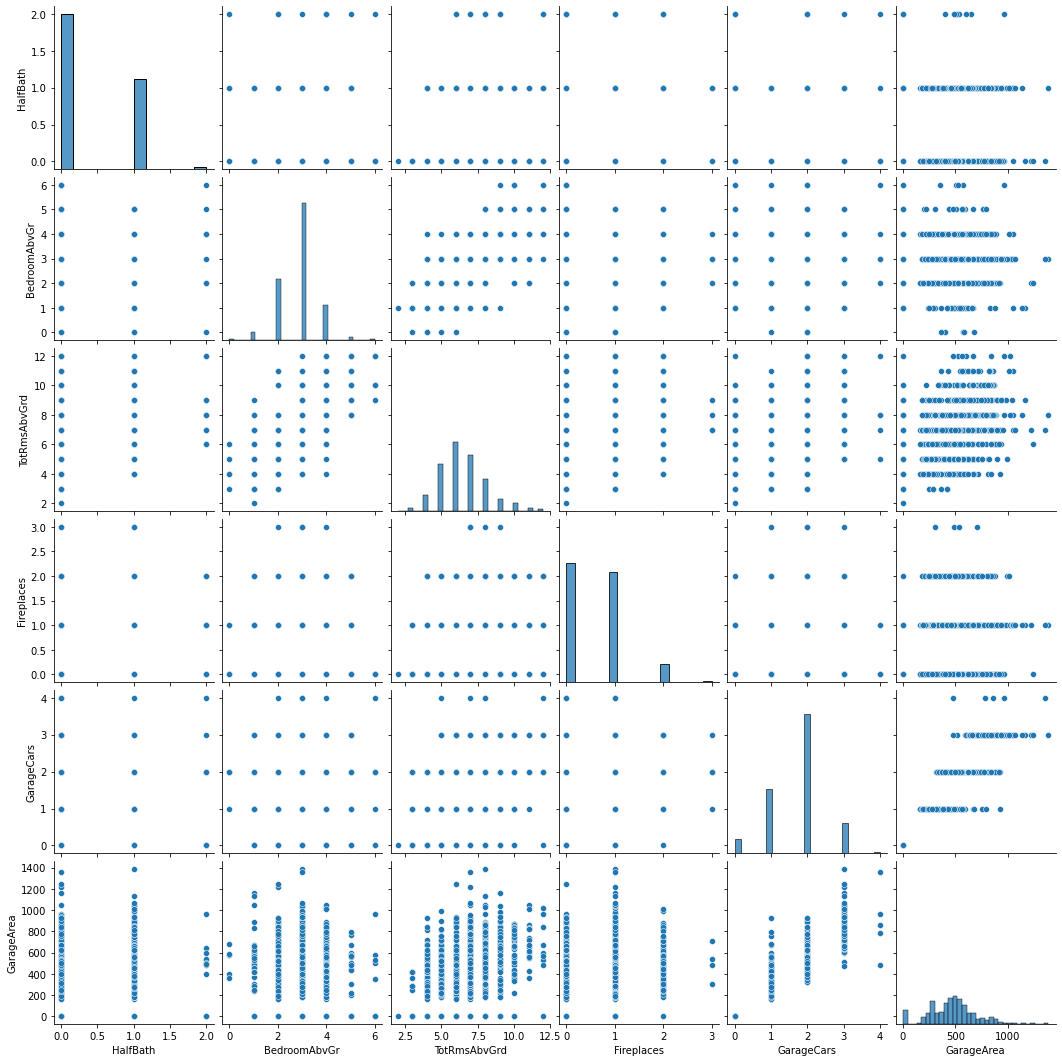

In [242]:
# Visualising Continuous variables
sns.pairplot(house[cols[12:18]])
plt.show()

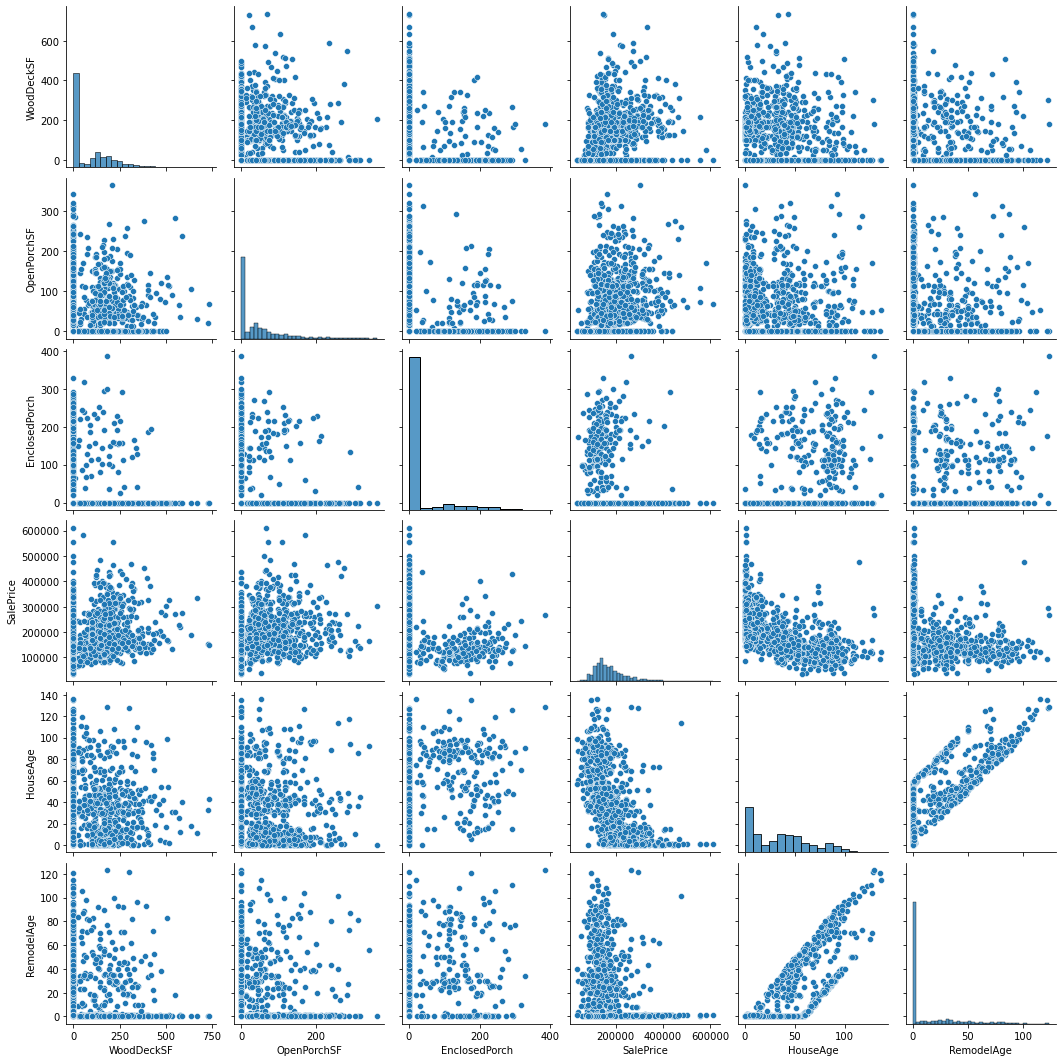

In [243]:
# Visualising Continuous variables
sns.pairplot(house[cols[18:24]])
plt.show()

#### Observations:
We can observe that the continuous variables are having linear correlations among them. So, we will be using the multiple linear regression to build the models. Some of the categorical variables are having strong positive correlations and most are mildly correlated, not showing strong patterns.

### Visualising Categorical Variables:

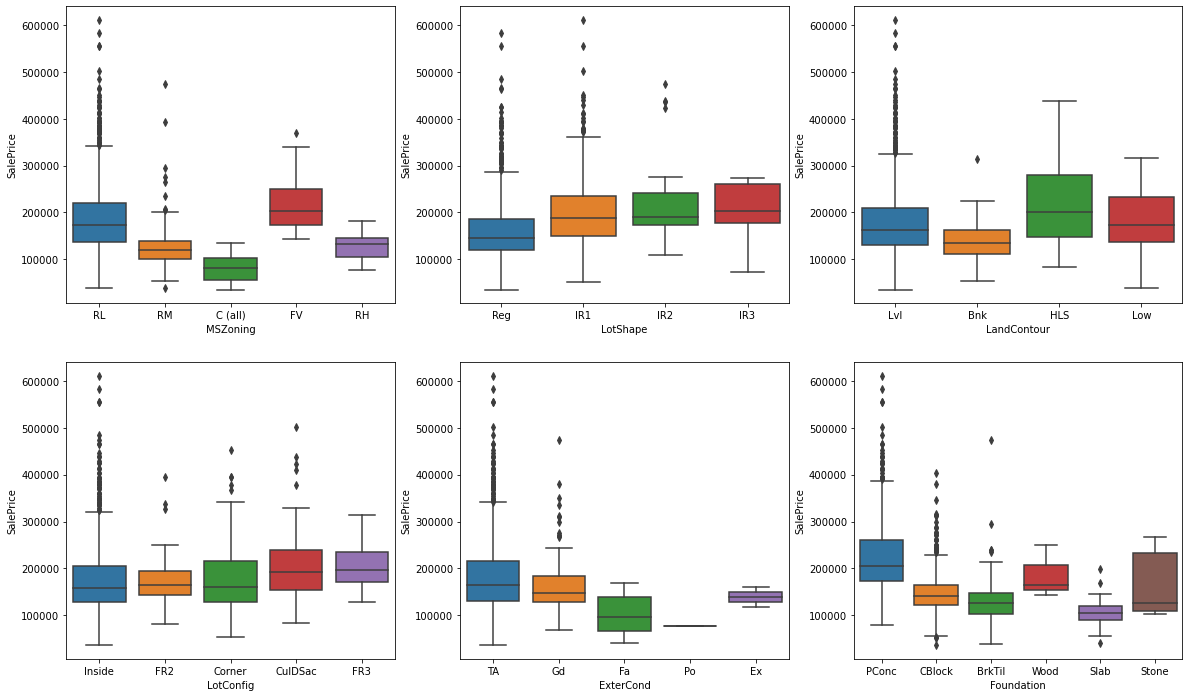

In [244]:
# Visualising Categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x= category[1],y='SalePrice',data=house)
plt.subplot(2,3,2)
sns.boxplot(x= category[2],y='SalePrice',data=house)
plt.subplot(2,3,3)
sns.boxplot(x= category[3],y='SalePrice',data=house)
plt.subplot(2,3,4)
sns.boxplot(x= category[4],y='SalePrice',data=house)
plt.subplot(2,3,5)
sns.boxplot(x= category[16],y='SalePrice',data=house)
plt.subplot(2,3,6)
sns.boxplot(x= category[17],y='SalePrice',data=house)
plt.show()


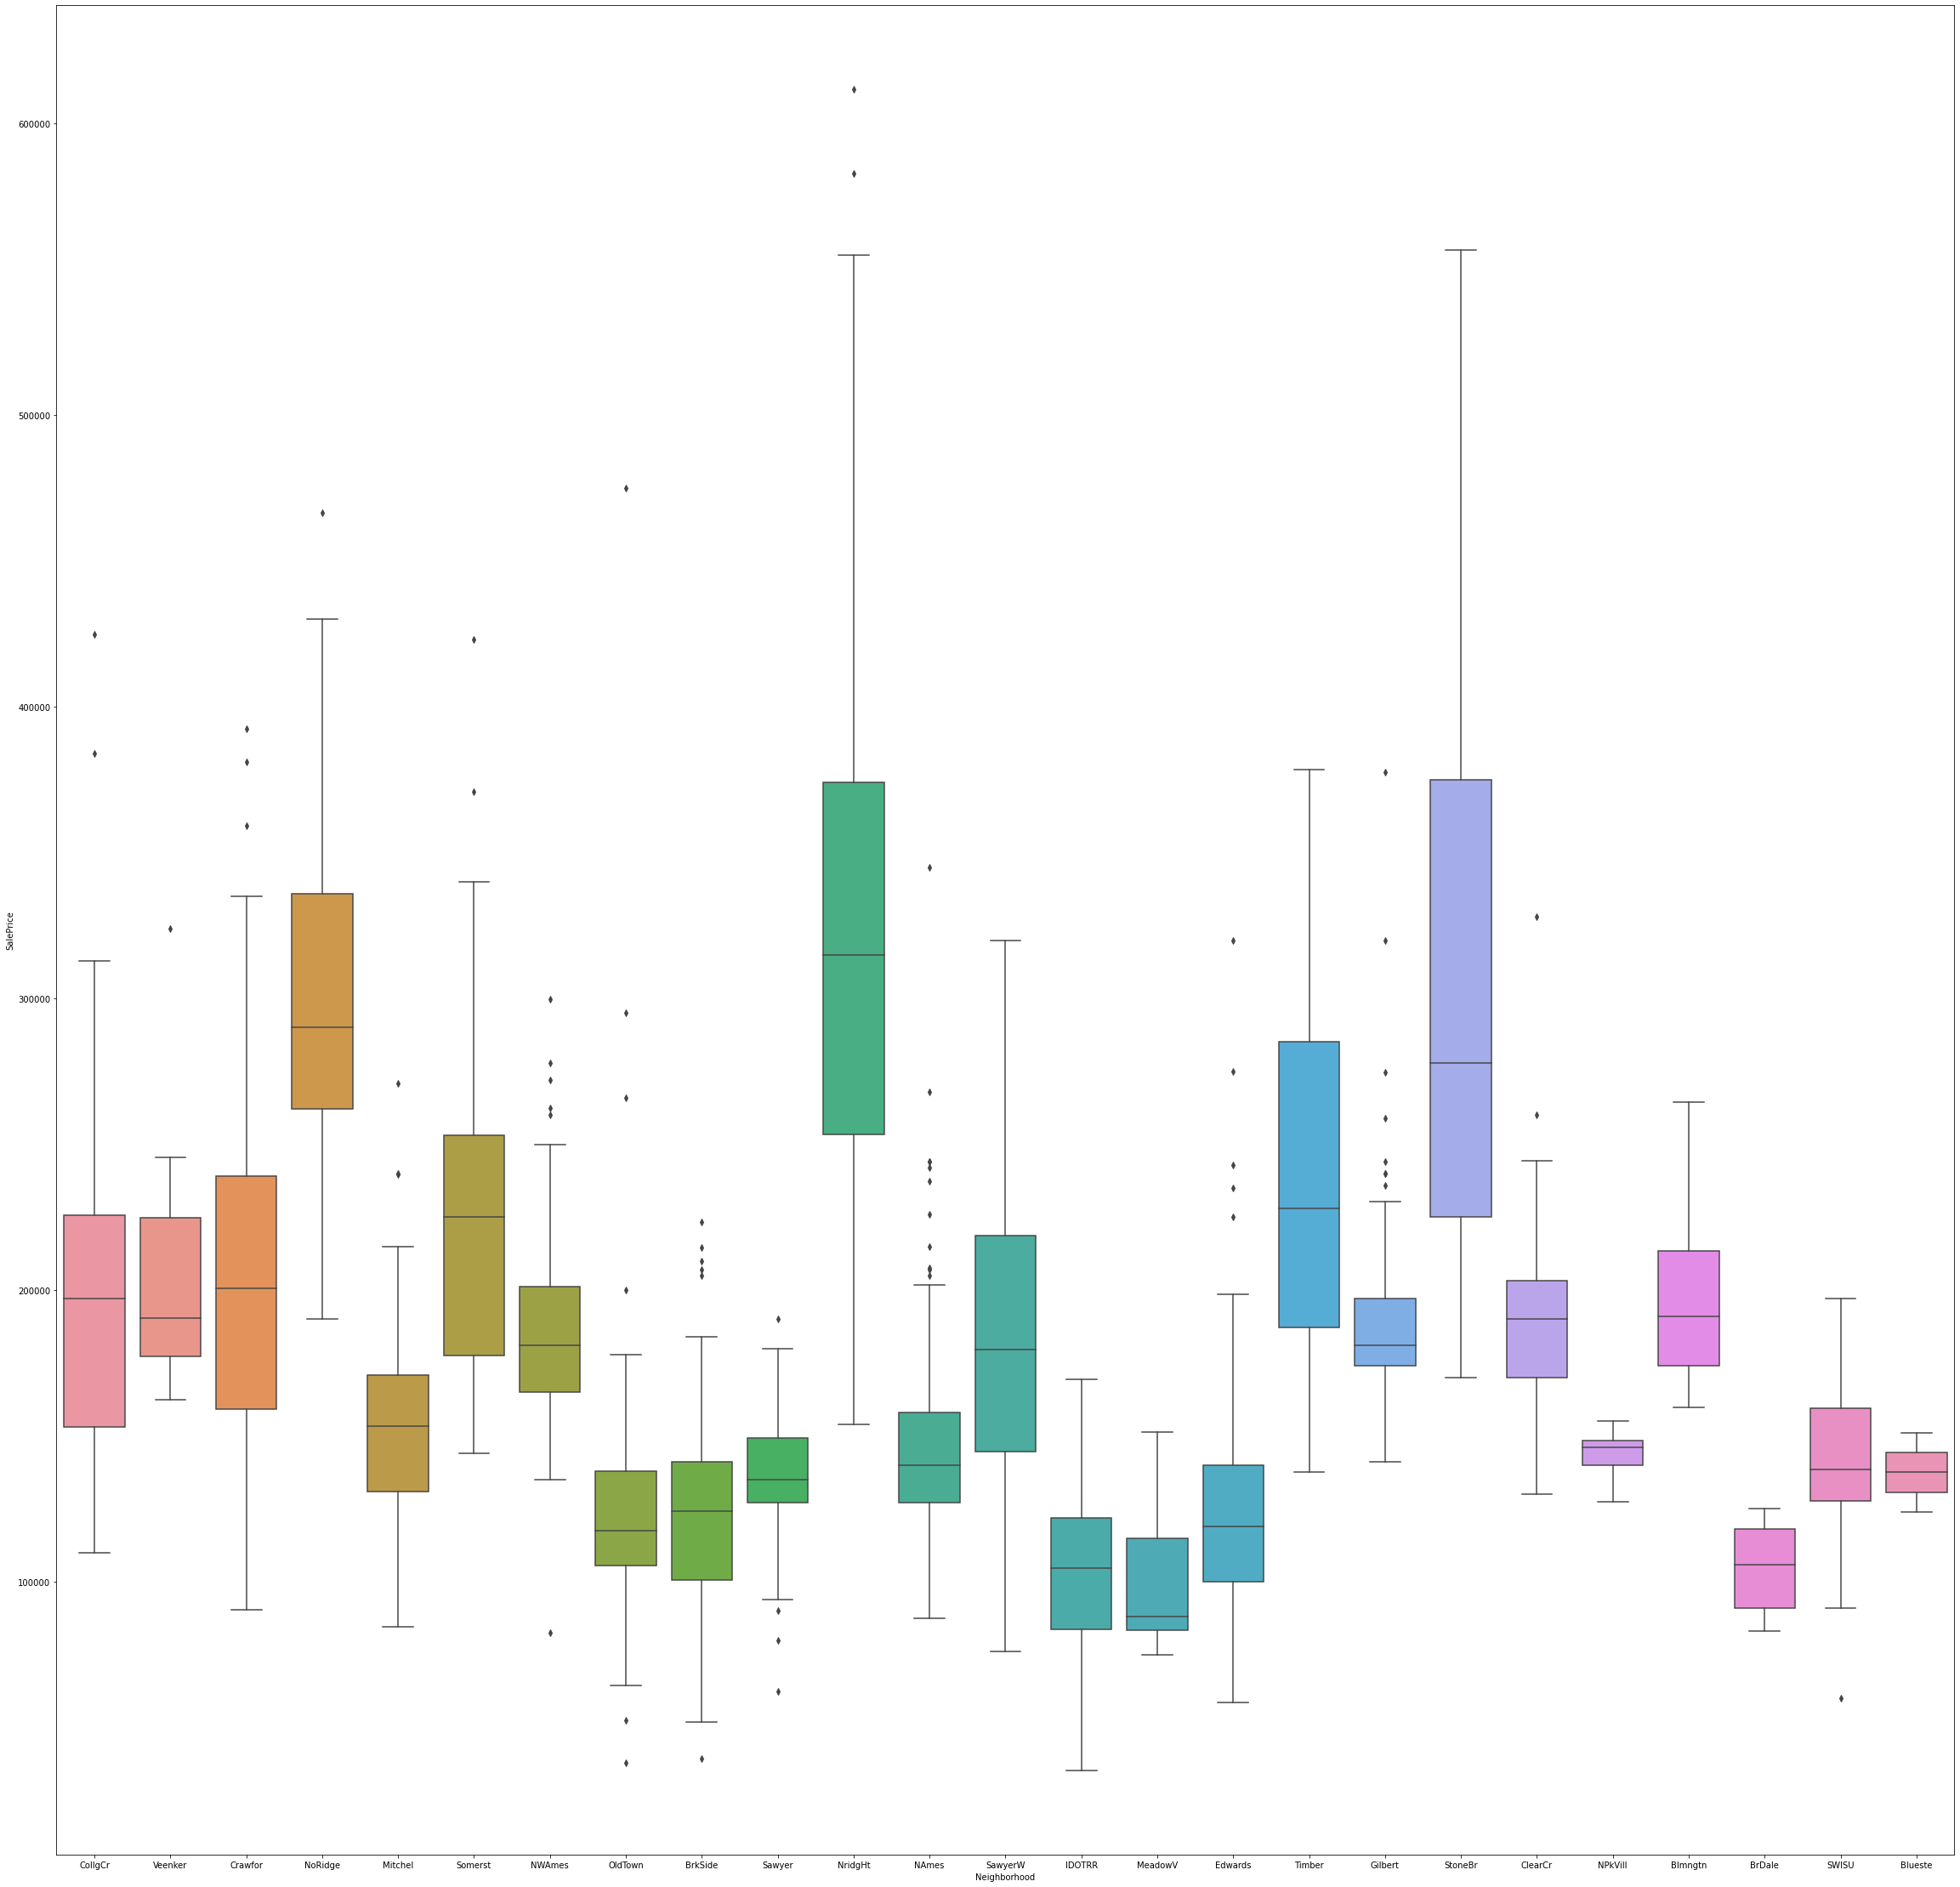

In [245]:
plt.figure(figsize=(40,40))
sns.boxplot(x= category[5],y='SalePrice',data=house)
plt.show()

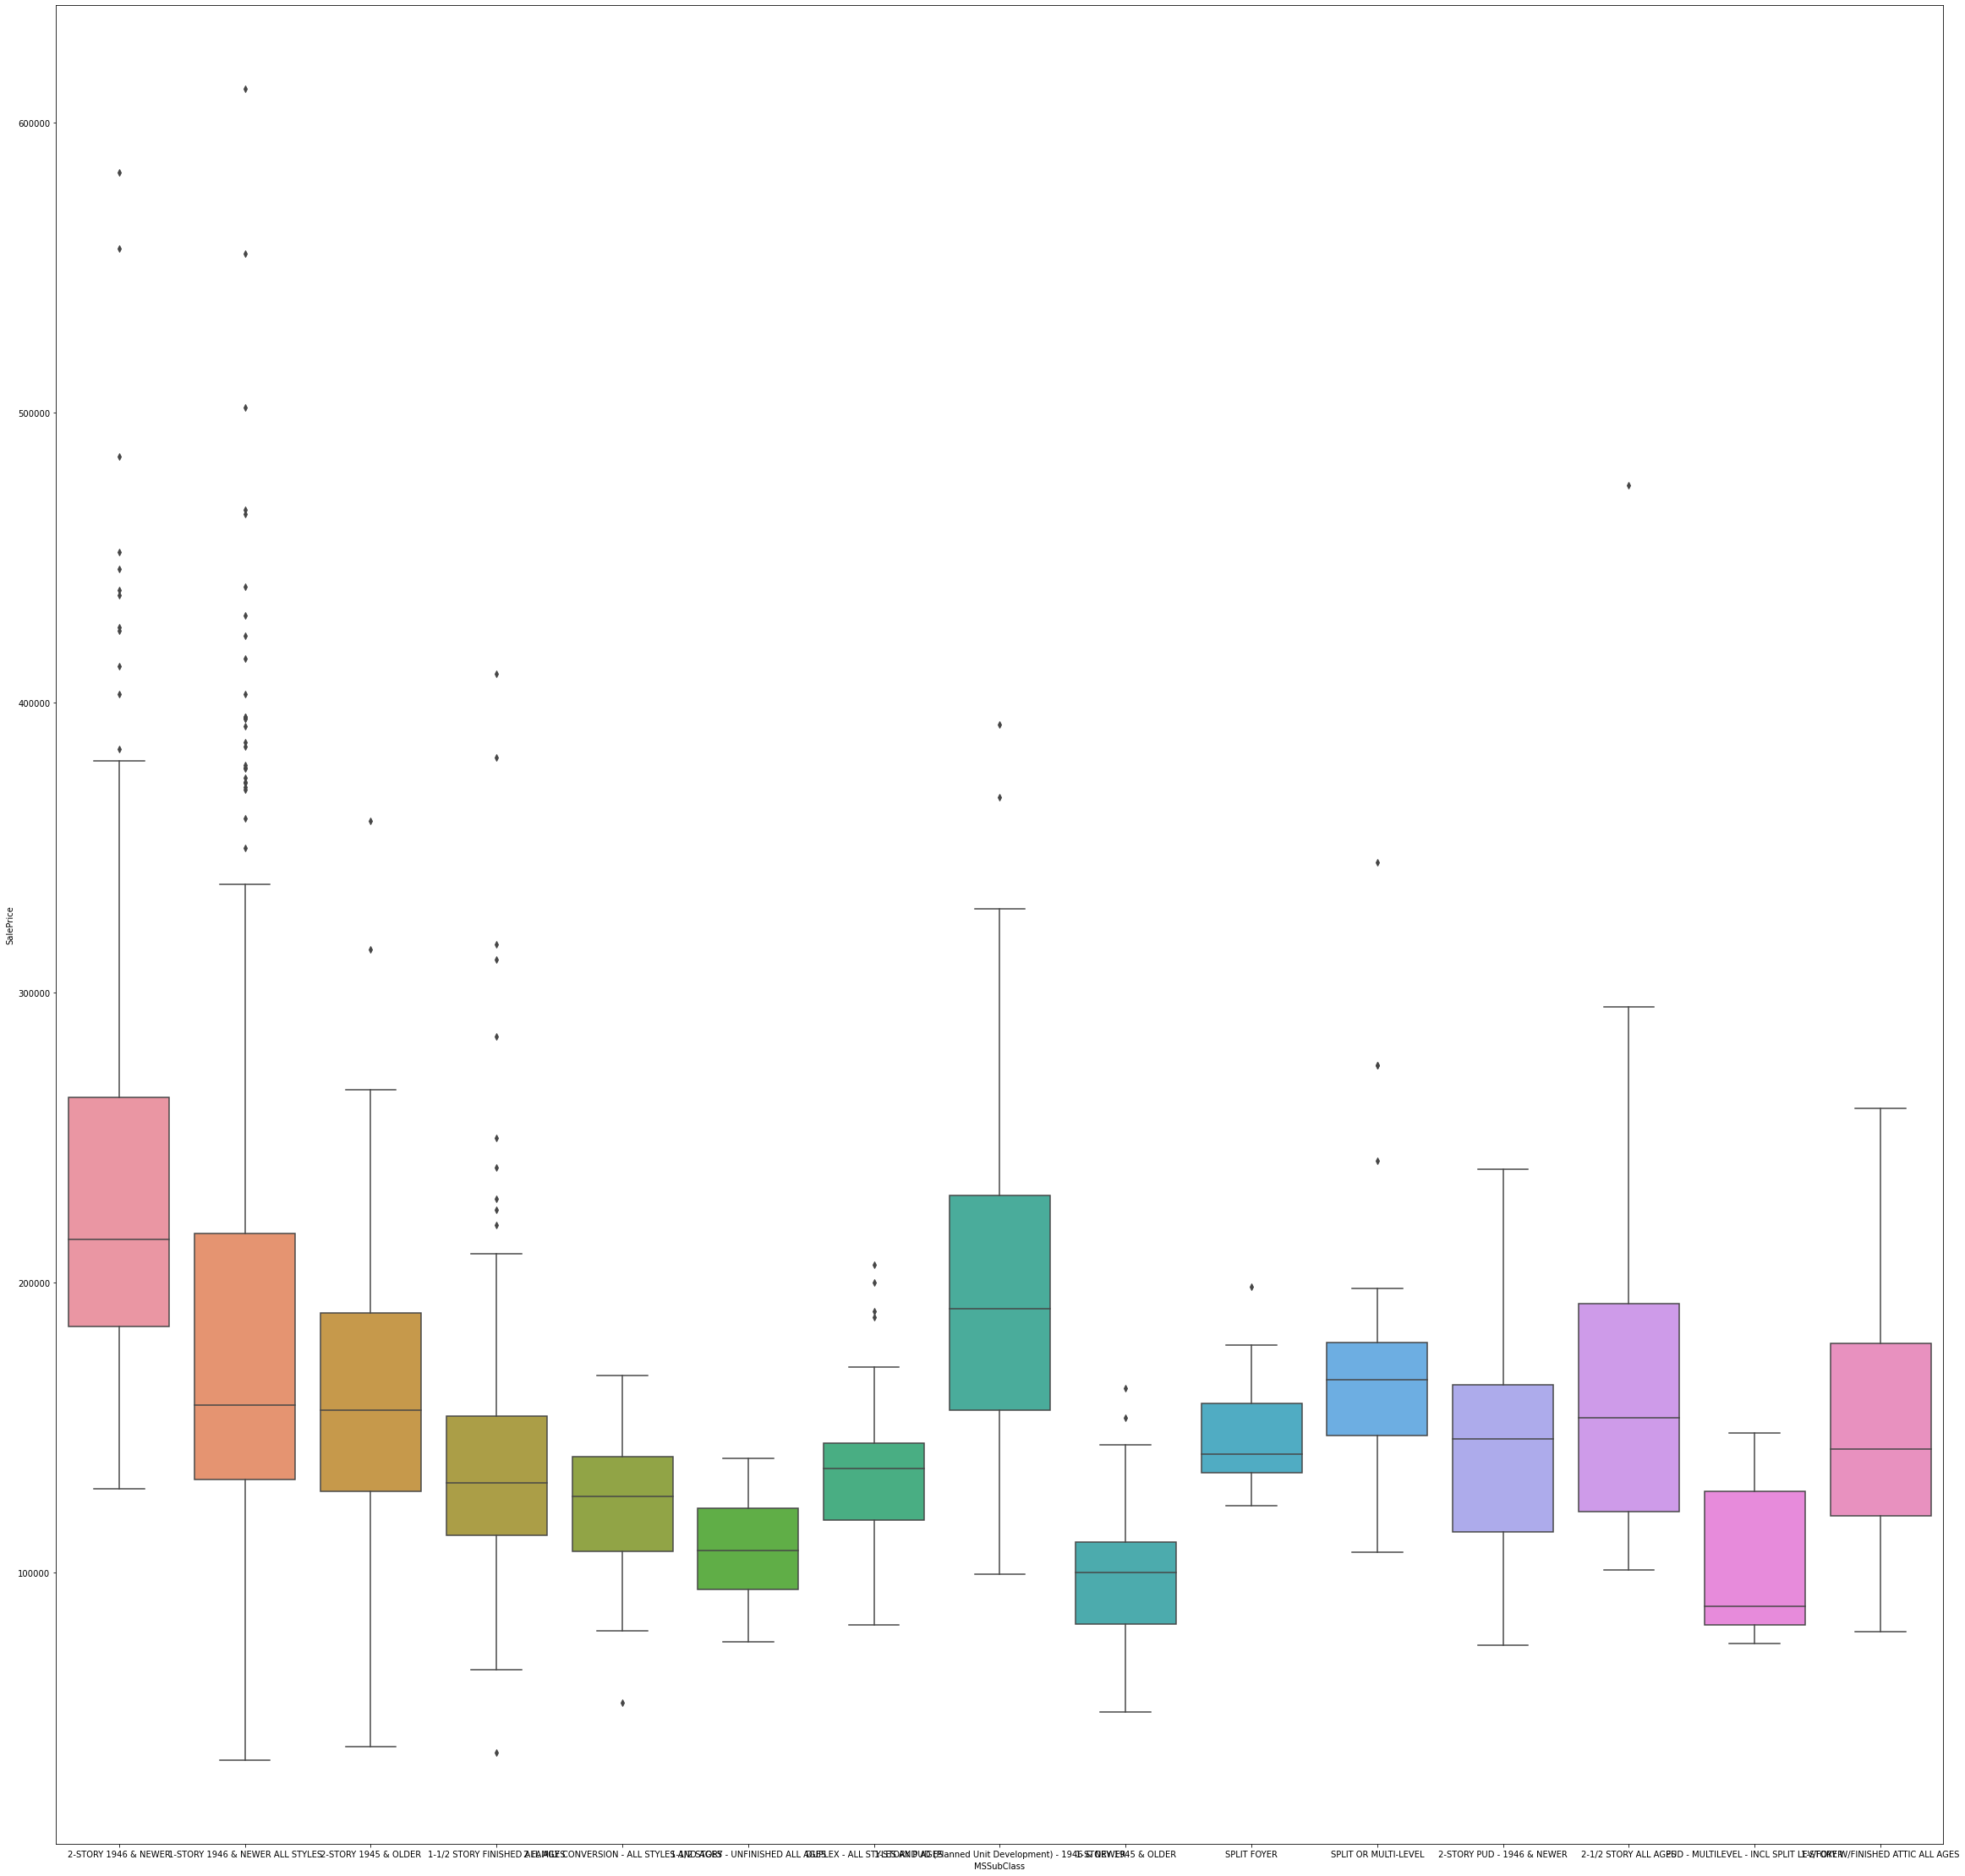

In [246]:
plt.figure(figsize=(40,40))
sns.boxplot(x= category[0],y='SalePrice',data=house)
plt.show()

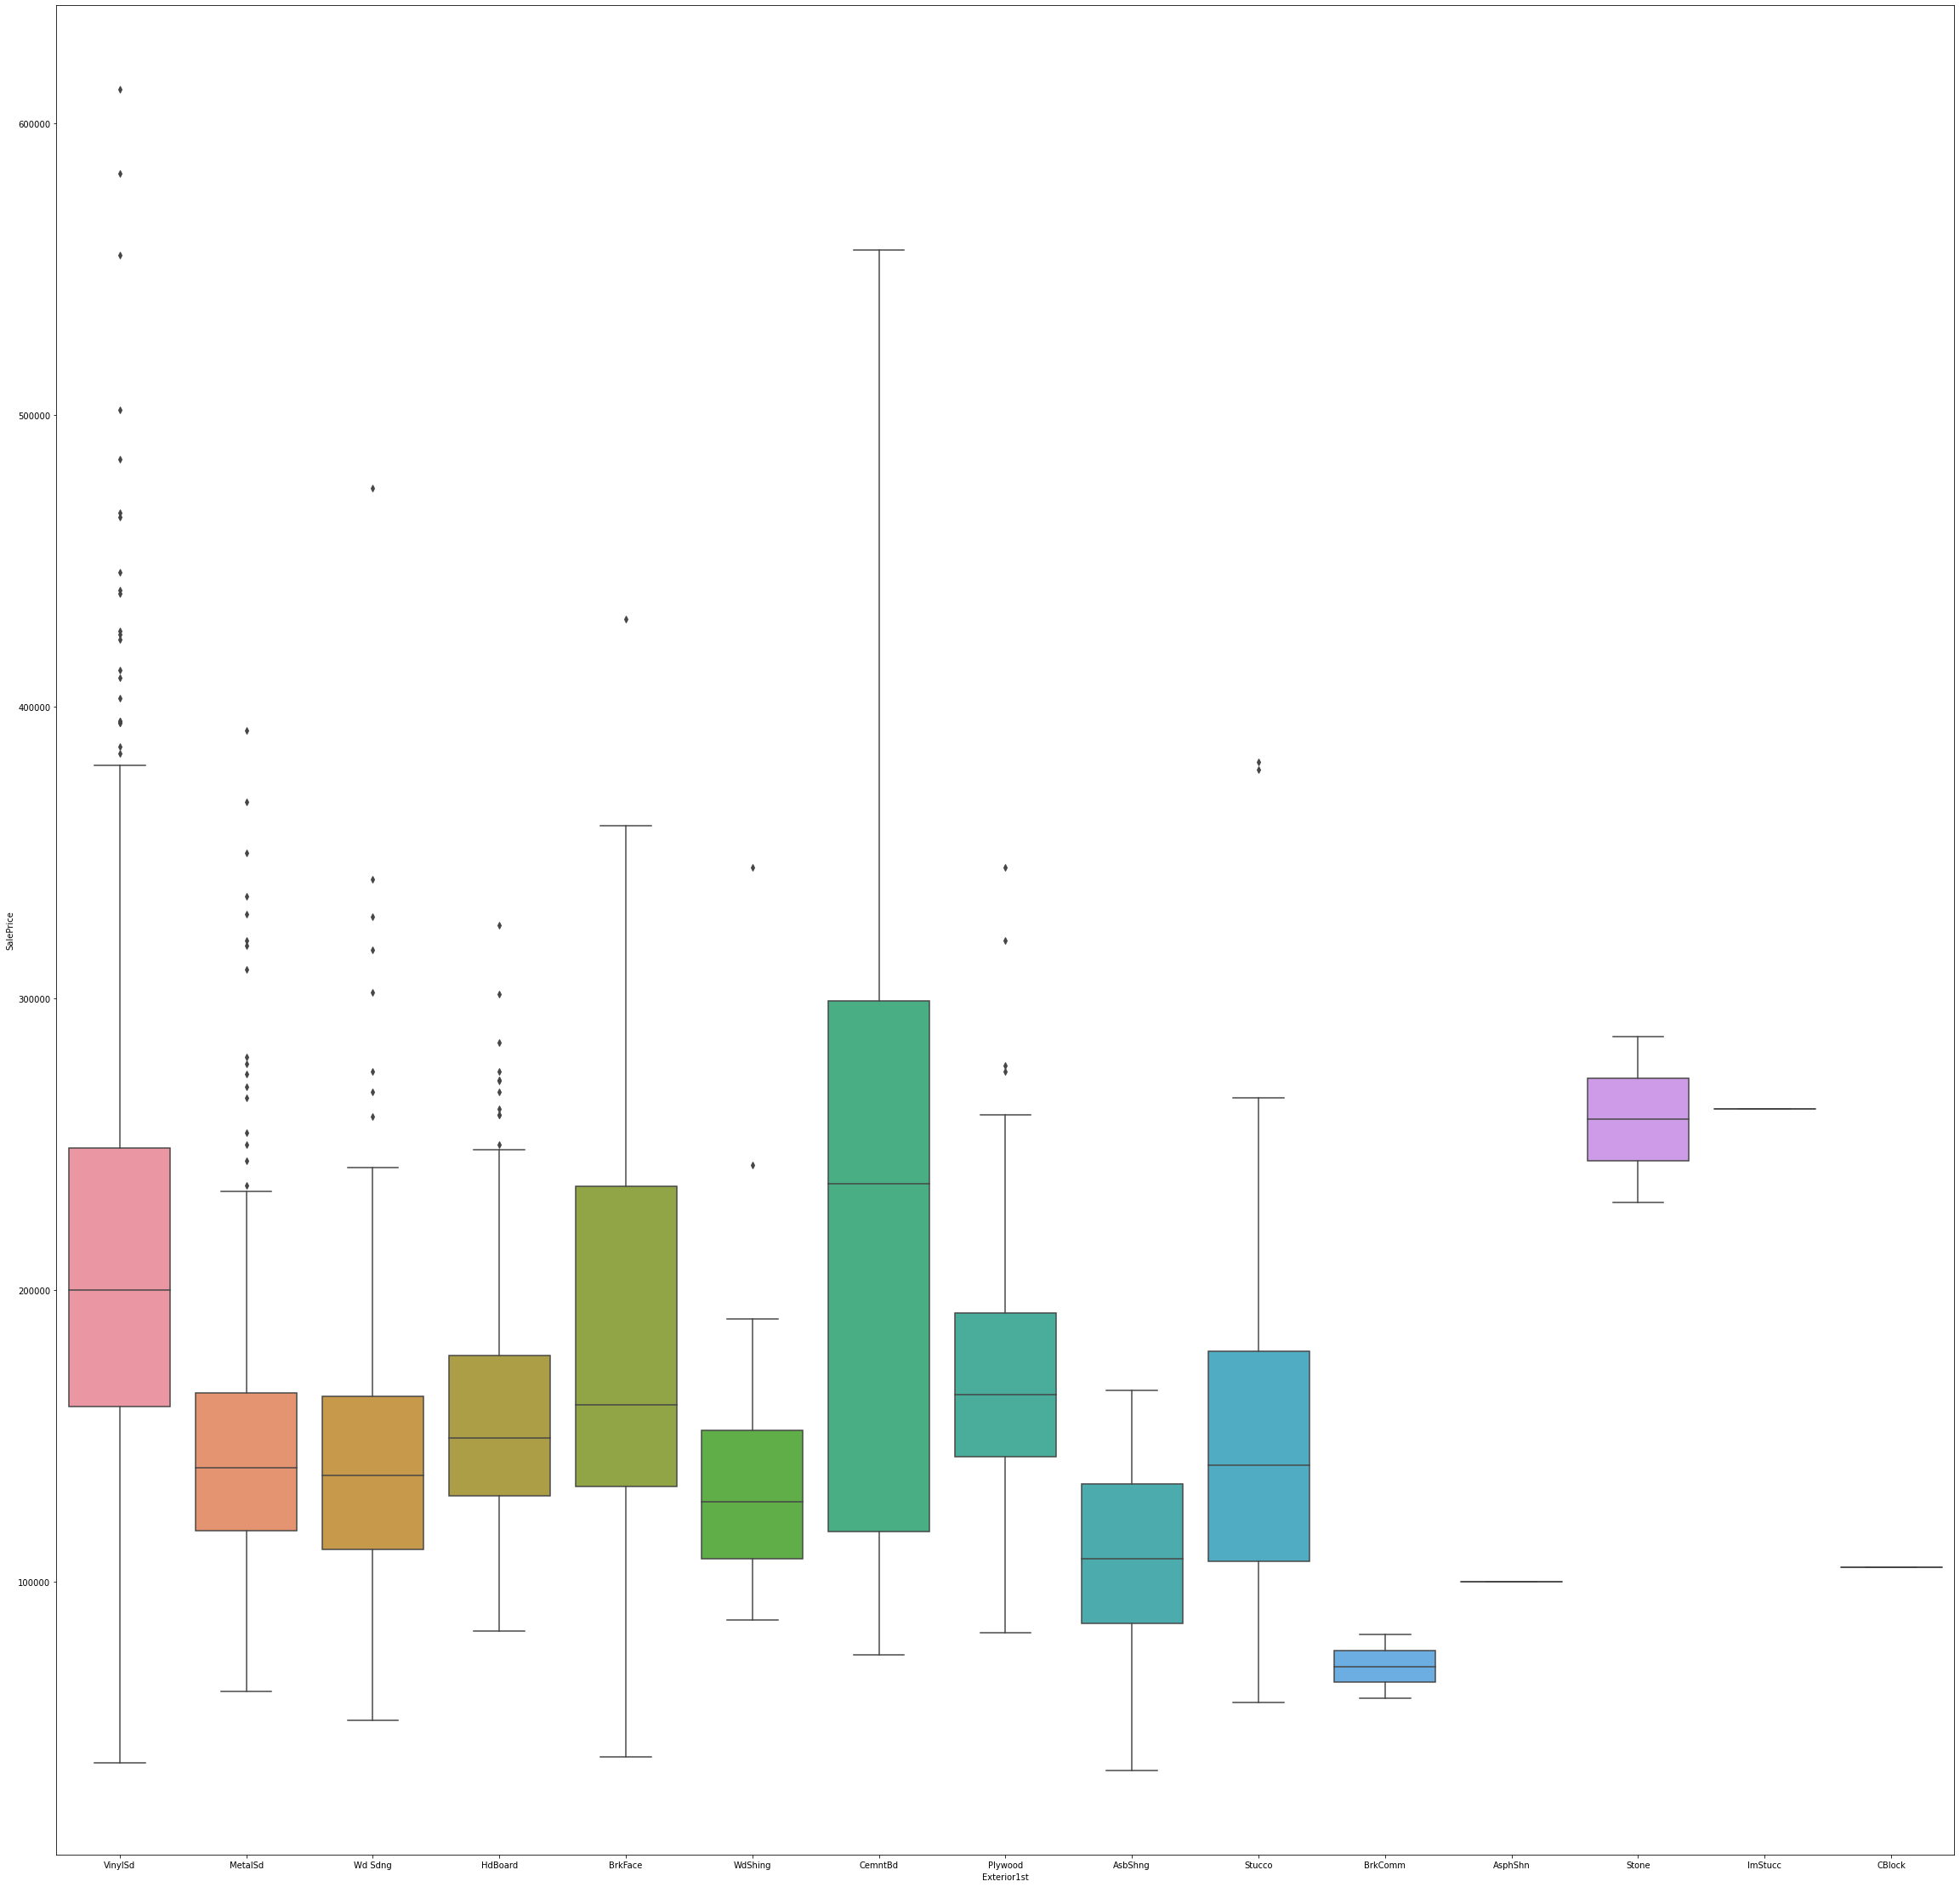

In [247]:
plt.figure(figsize=(40,40))
sns.boxplot(x= category[12],y='SalePrice',data=house)
plt.show()

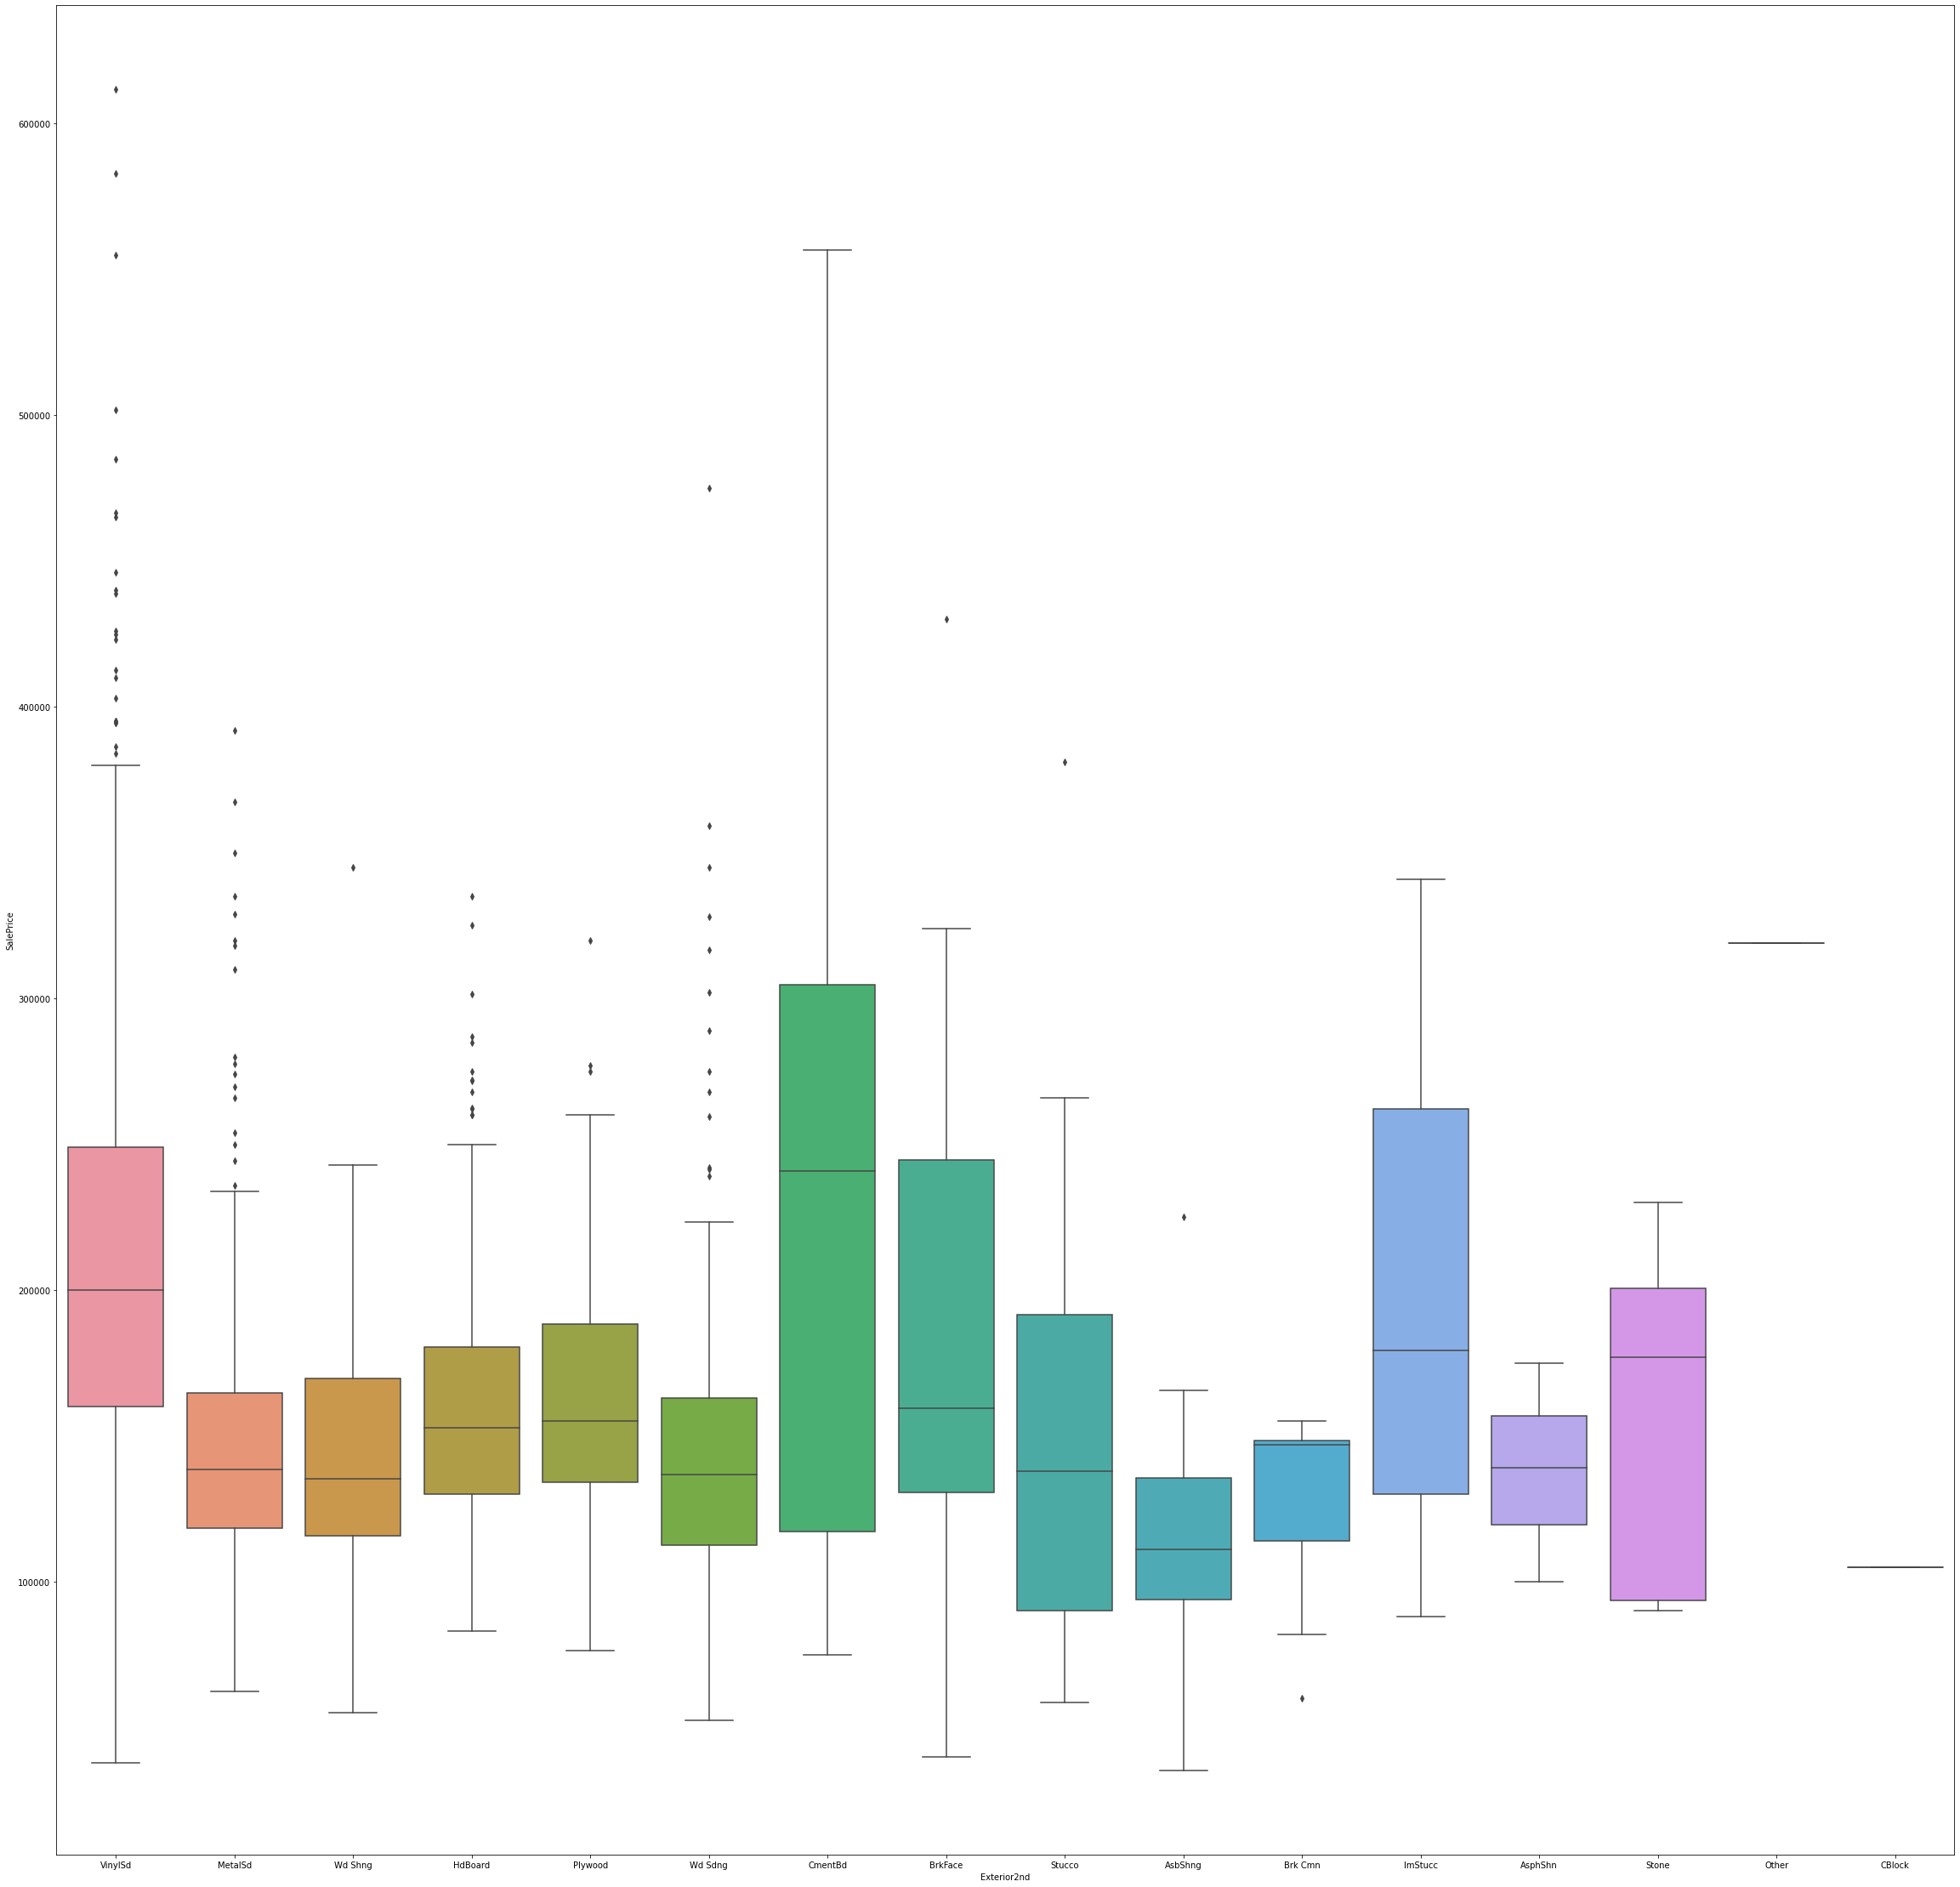

In [248]:
plt.figure(figsize=(40,40))
sns.boxplot(x= category[13],y='SalePrice',data=house)
plt.show()

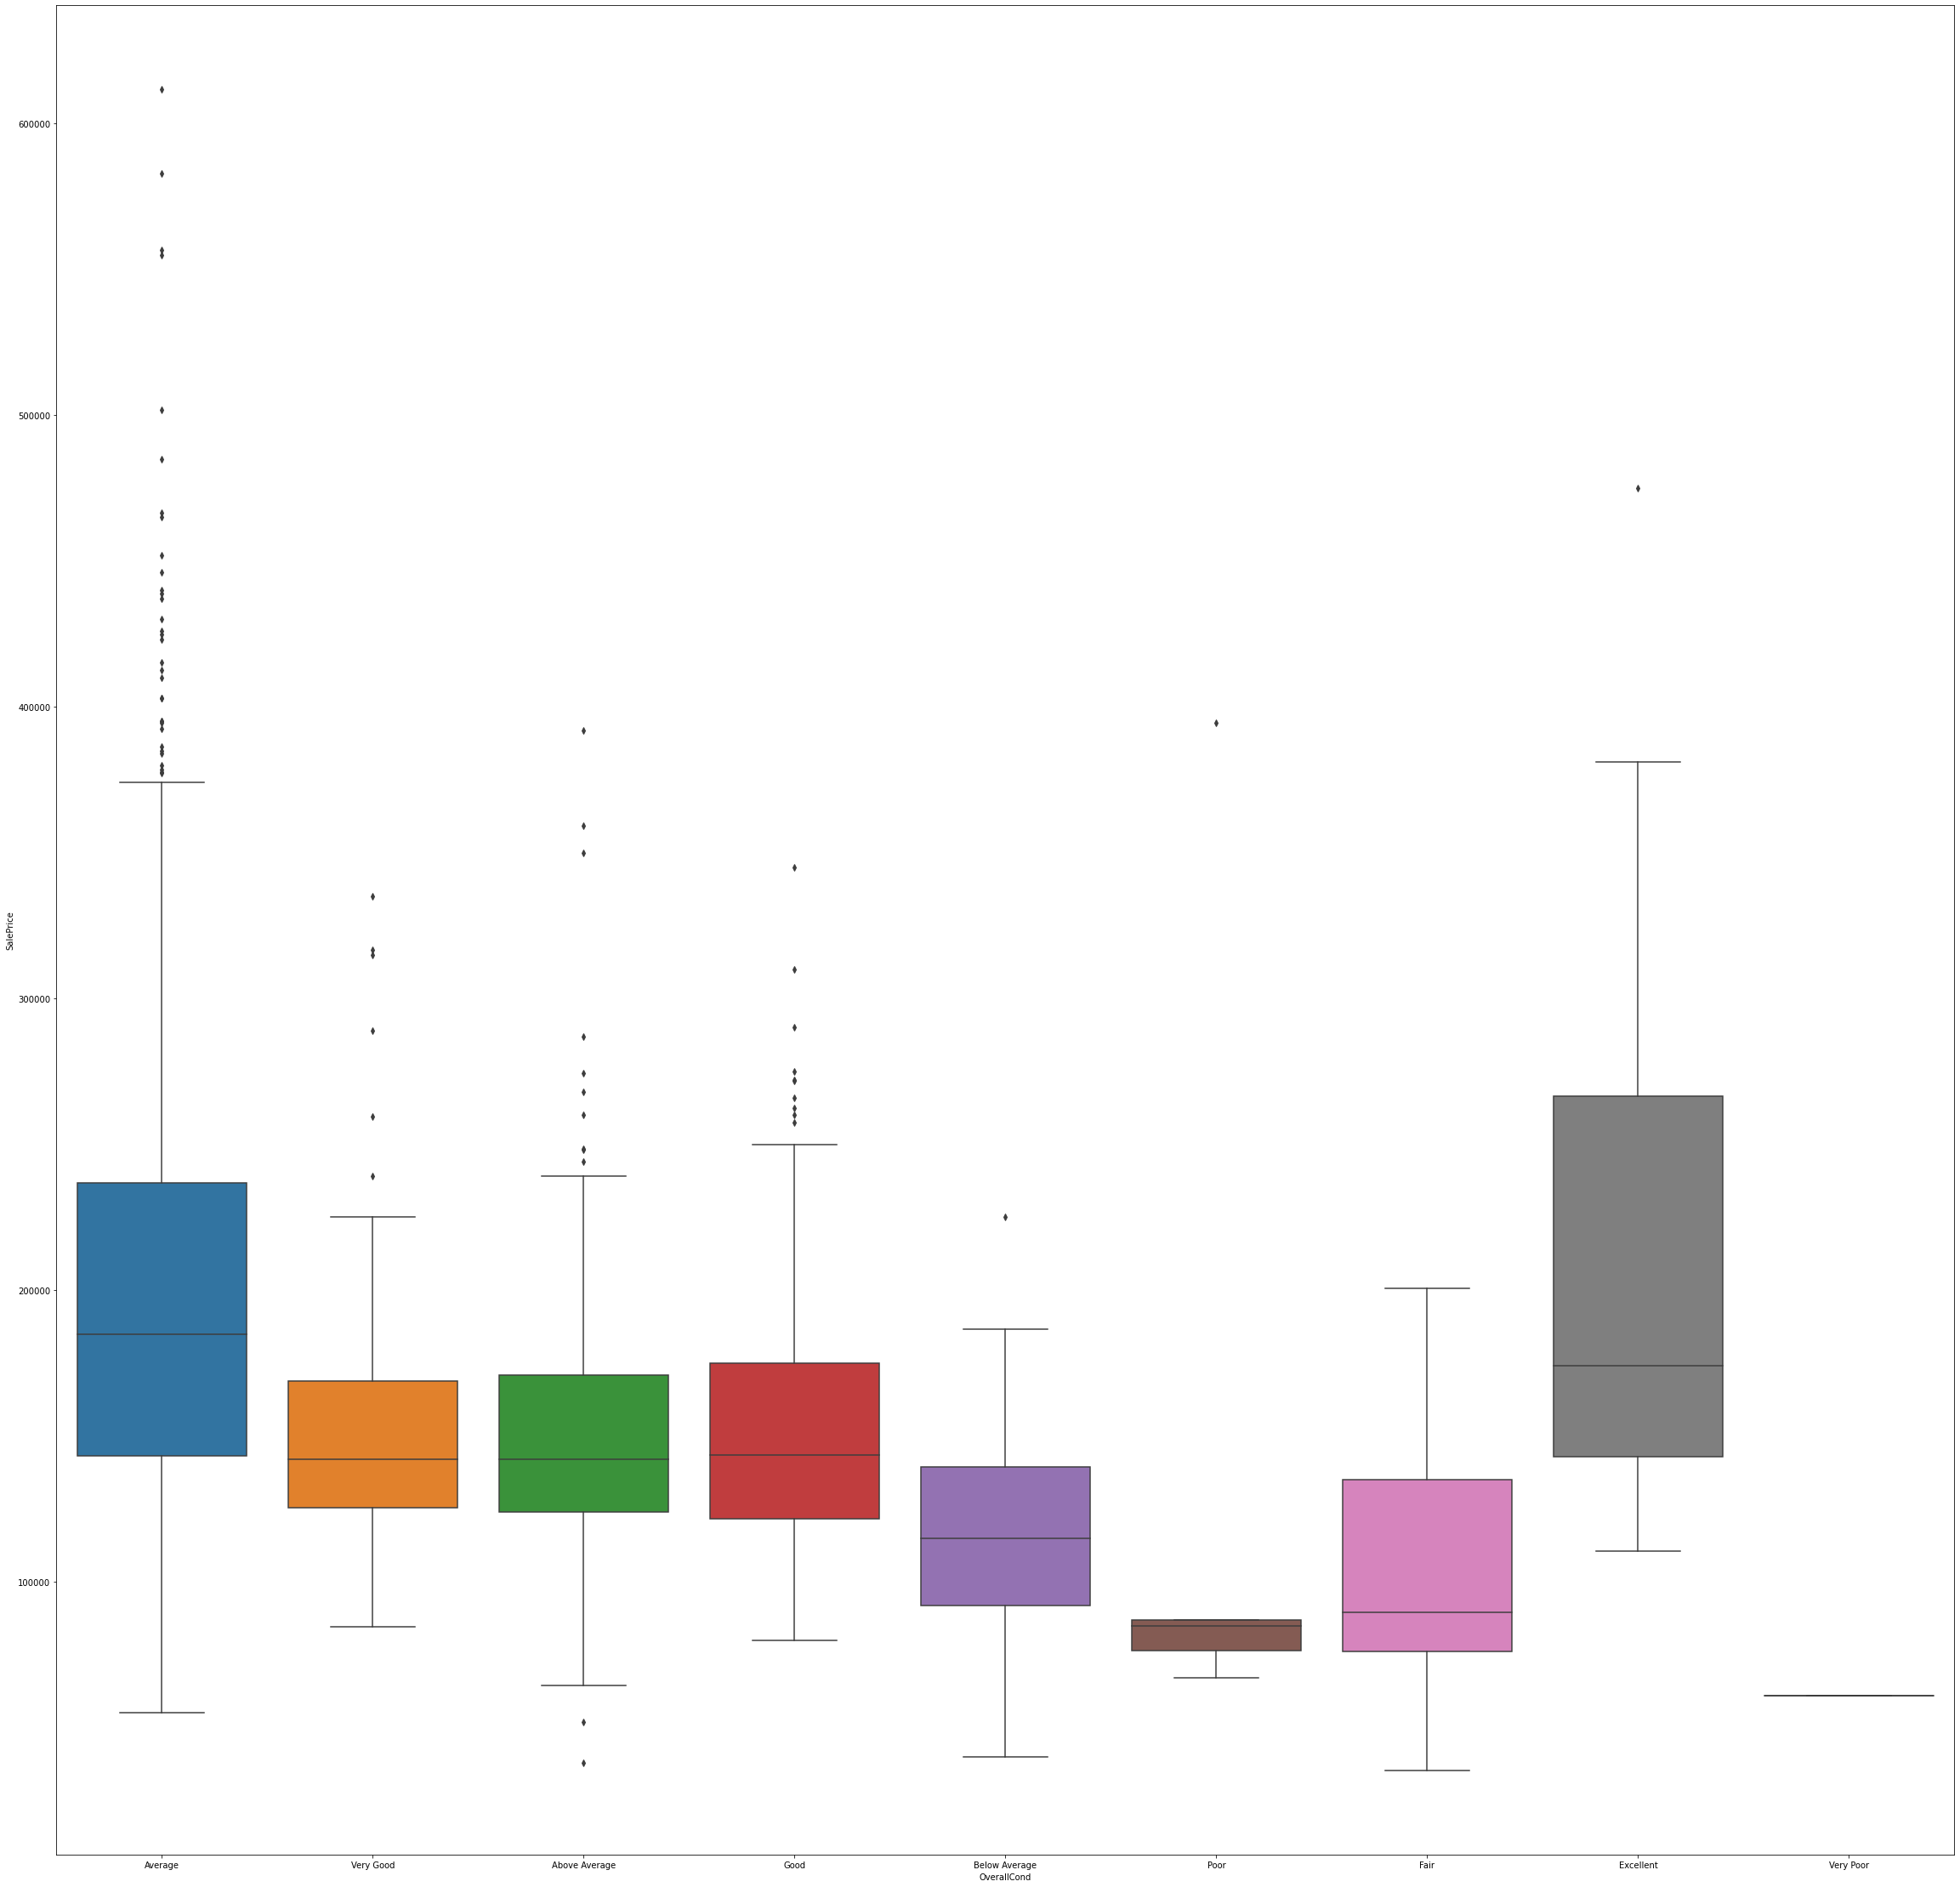

In [249]:
plt.figure(figsize=(40,40))
sns.boxplot(x= category[10],y='SalePrice',data=house)
plt.show()

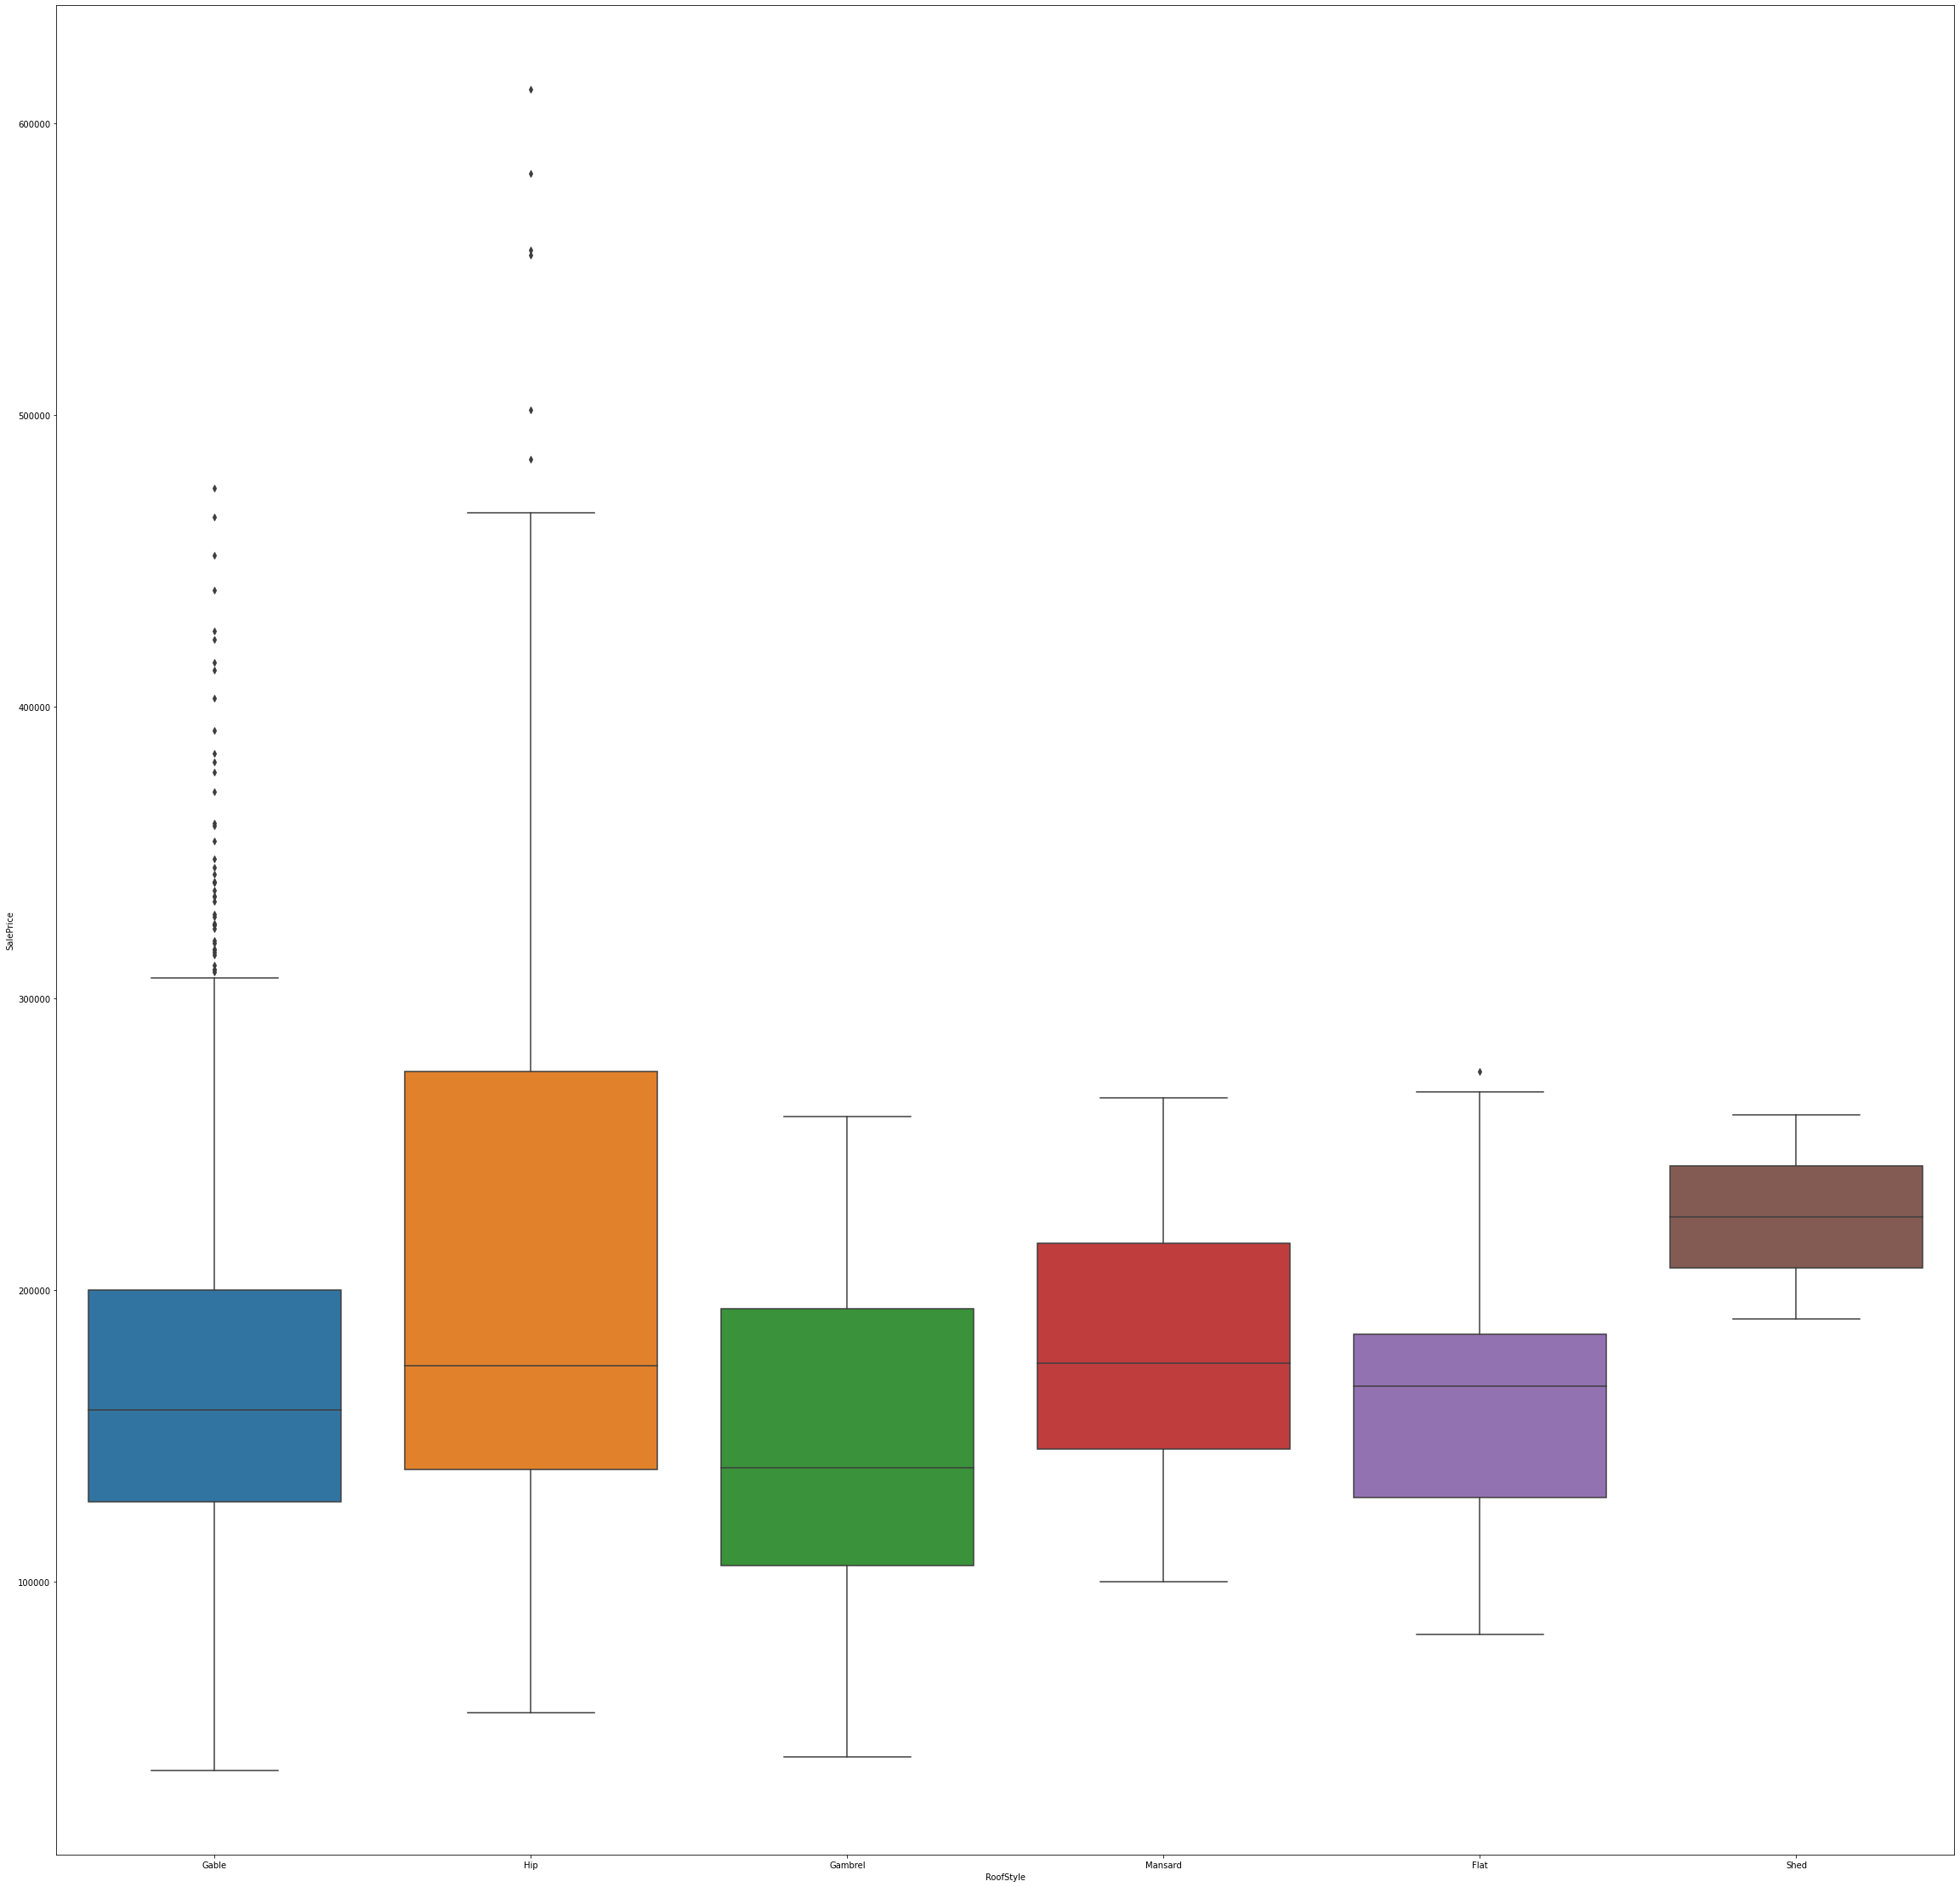

In [250]:
plt.figure(figsize=(40,40))
sns.boxplot(x= category[11],y='SalePrice',data=house)
plt.show()

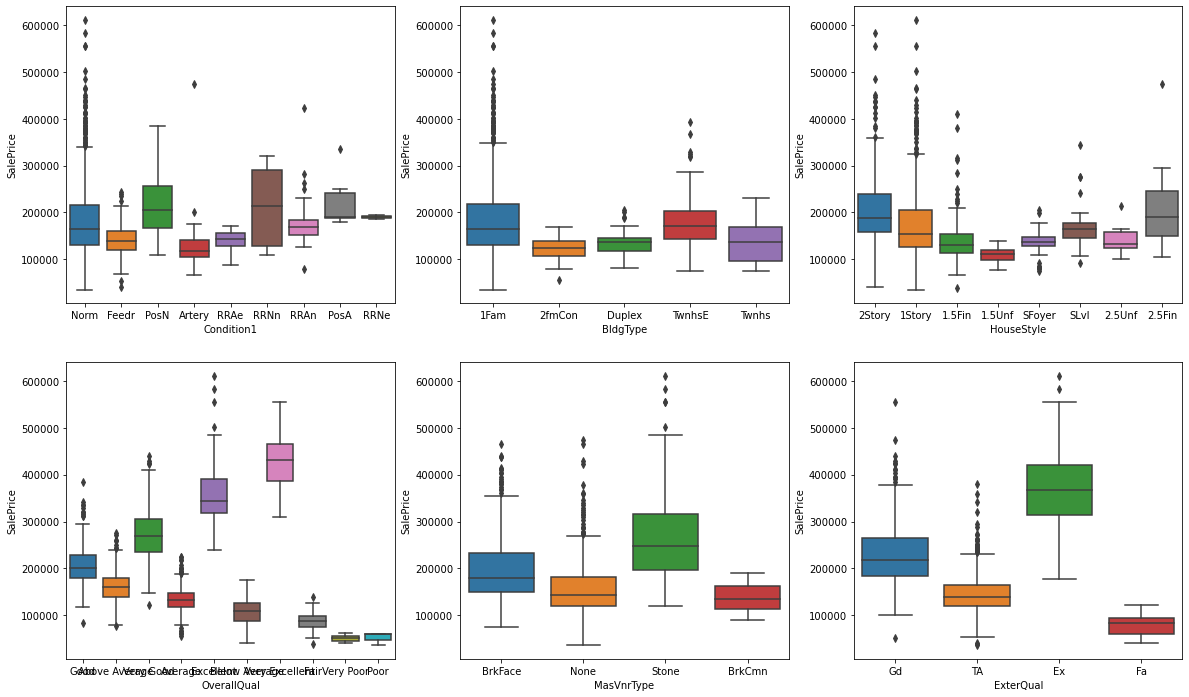

In [251]:
# Visualising Categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x= category[6],y='SalePrice',data=house)
plt.subplot(2,3,2)
sns.boxplot(x= category[7],y='SalePrice',data=house)
plt.subplot(2,3,3)
sns.boxplot(x= category[8],y='SalePrice',data=house)
plt.subplot(2,3,4)
sns.boxplot(x= category[9],y='SalePrice',data=house)
plt.subplot(2,3,5)
sns.boxplot(x= category[14],y='SalePrice',data=house)
plt.subplot(2,3,6)
sns.boxplot(x= category[15],y='SalePrice',data=house)
plt.show()


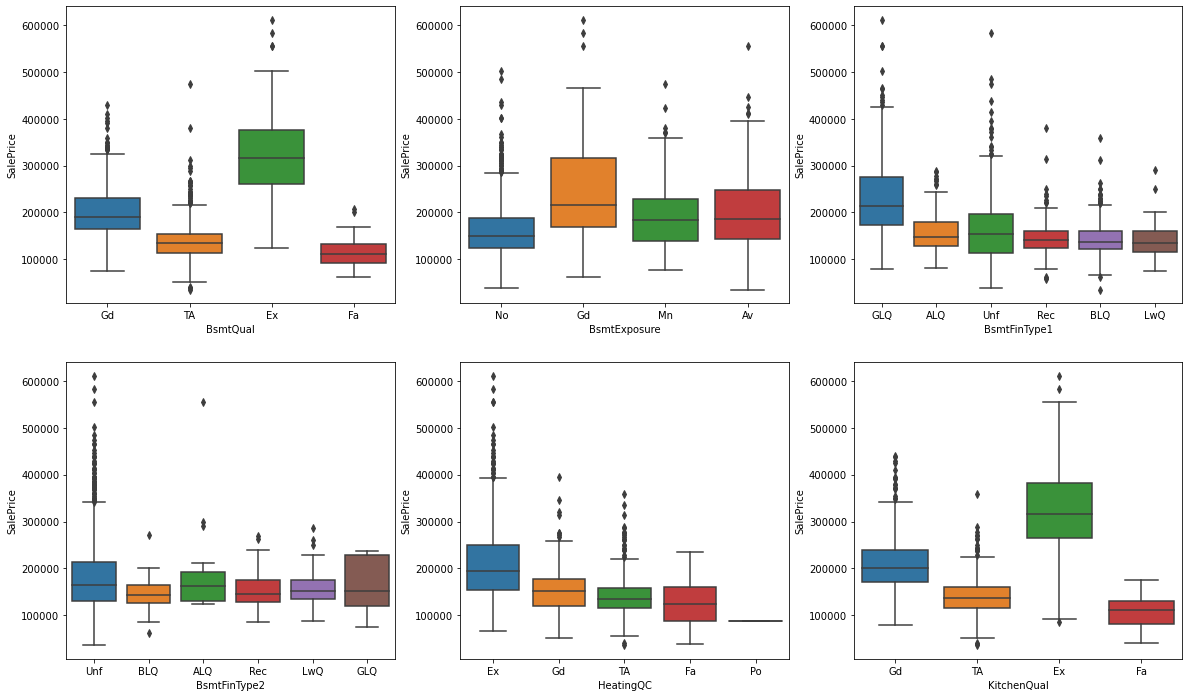

In [252]:
# Visualising Categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x= category[18],y='SalePrice',data=house)
plt.subplot(2,3,2)
sns.boxplot(x= category[19],y='SalePrice',data=house)
plt.subplot(2,3,3)
sns.boxplot(x= category[20],y='SalePrice',data=house)
plt.subplot(2,3,4)
sns.boxplot(x= category[21],y='SalePrice',data=house)
plt.subplot(2,3,5)
sns.boxplot(x= category[22],y='SalePrice',data=house)
plt.subplot(2,3,6)
sns.boxplot(x= category[23],y='SalePrice',data=house)
plt.show()


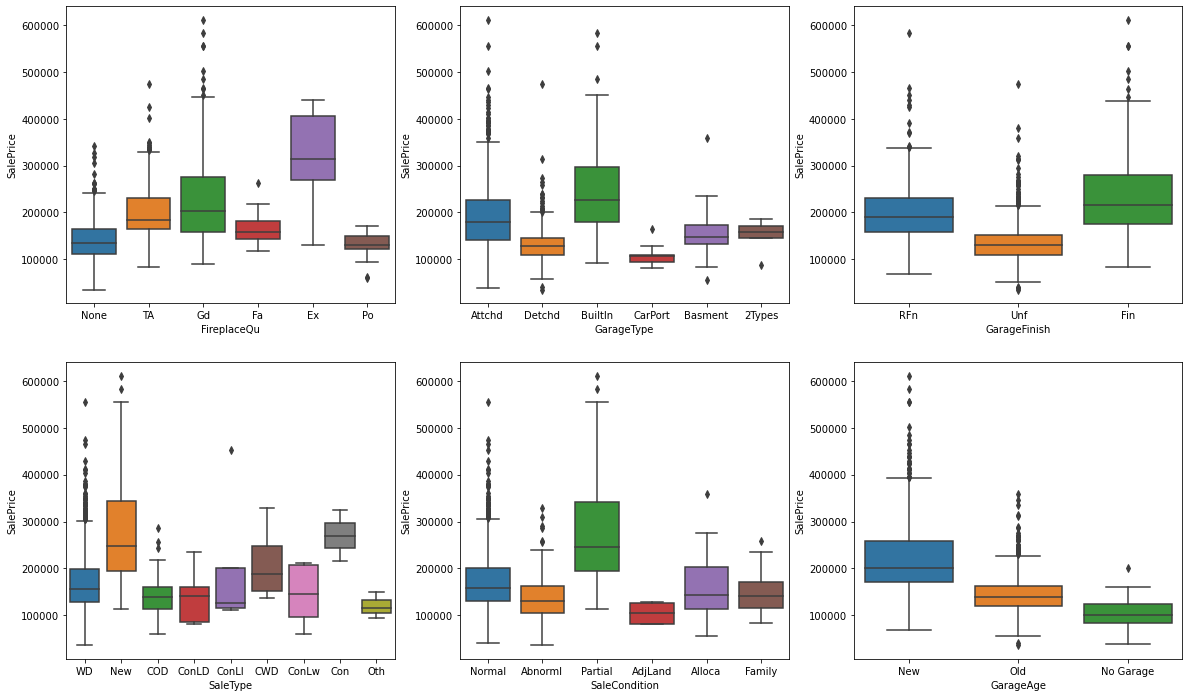

In [253]:
# Visualising Categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x= category[24],y='SalePrice',data=house)
plt.subplot(2,3,2)
sns.boxplot(x= category[25],y='SalePrice',data=house)
plt.subplot(2,3,3)
sns.boxplot(x= category[26],y='SalePrice',data=house)
plt.subplot(2,3,4)
sns.boxplot(x= category[27],y='SalePrice',data=house)
plt.subplot(2,3,5)
sns.boxplot(x= category[28],y='SalePrice',data=house)
plt.subplot(2,3,6)
sns.boxplot(x= category[29],y='SalePrice',data=house)
plt.show()


### Heatmap to check correlations:

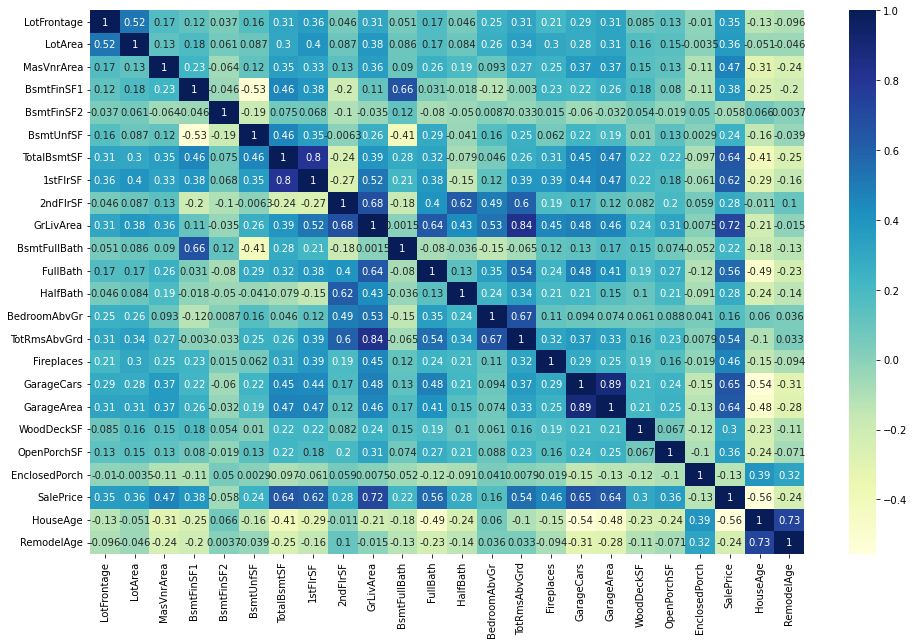

In [254]:
#Checking Heatmaps to see highly correlated coefficients
plt.figure(figsize=(16,10))
sns.heatmap(house.corr(),annot=True,cmap="YlGnBu")
plt.show()

Since the columns ('TotalBsmtSF', '1stFlrSF'), ('TotRmsAbvGrd','GrLivArea') and ('GarageCars', 'GarageArea') are having high correlation, we will drop one of them.

In [255]:
house.drop(columns=['1stFlrSF','GrLivArea','GarageCars'],inplace=True)

## Step 4: Data Preparation and Test-Train Split:

### Creation of Dummy Variables:

In [256]:
house = pd.get_dummies(house,drop_first=True)
house.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_No Garage,GarageAge_Old
0,65.0,8450,196.0,706,0,150,856,854,1,2,...,0,0,1,0,0,0,1,0,0,0
1,80.0,9600,0.0,978,0,284,1262,0,0,2,...,0,0,1,0,0,0,1,0,0,1
2,68.0,11250,162.0,486,0,434,920,866,1,2,...,0,0,1,0,0,0,1,0,0,0
3,60.0,9550,0.0,216,0,540,756,756,1,1,...,0,0,1,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1053,1,2,...,0,0,1,0,0,0,1,0,0,0


In [257]:
for i in house.columns:
    print(i)

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
2ndFlrSF
BsmtFullBath
FullBath
HalfBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
SalePrice
HouseAge
RemodelAge
MSSubClass_1-1/2 STORY FINISHED ALL AGES
MSSubClass_1-STORY 1945 & OLDER
MSSubClass_1-STORY 1946 & NEWER ALL STYLES
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES
MSSubClass_2-1/2 STORY ALL AGES
MSSubClass_2-STORY 1945 & OLDER
MSSubClass_2-STORY 1946 & NEWER
MSSubClass_2-STORY PUD - 1946 & NEWER
MSSubClass_DUPLEX - ALL STYLES AND AGES
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
MSSubClass_SPLIT FOYER
MSSubClass_SPLIT OR MULTI-LEVEL
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
Neighborhood_

### Performing test-train split:

In [258]:
import sklearn
from sklearn.model_selection import train_test_split

house_train, house_test = train_test_split(house,train_size = 0.7, random_state = 35)

In [259]:
house_train.shape

(997, 208)

In [260]:
house_test.shape

(428, 208)

### Rescaling the Features (For Training Set):

In [261]:
# List of Numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

house.select_dtypes(include=numerics).columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice', 'HouseAge',
       'RemodelAge'],
      dtype='object')

We will be using MinMax Scaling to bring all the variables in the same scale to further build our model.

In [262]:
#Importing required libraries
from sklearn.preprocessing import MinMaxScaler

#1. Instantiate an object
scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice', 'HouseAge',
       'RemodelAge']

#2. Fit and transform on training data
house_train[num_vars] = scaler.fit_transform(house_train[num_vars])
house_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_No Garage,GarageAge_Old
742,0.273292,0.203125,0.096861,0.000000,0.0,0.659335,0.421563,0.000000,0.0,0.666667,...,0,0,1,0,0,0,1,0,0,0
111,0.298137,0.183239,0.000000,0.114260,0.0,0.065494,0.120000,0.407200,0.0,0.666667,...,0,0,1,0,0,0,1,0,0,0
405,0.298137,0.246903,0.000000,0.510055,0.0,0.080645,0.400313,0.000000,0.5,0.666667,...,0,0,1,0,0,0,1,0,0,0
914,0.055901,0.048295,0.068161,0.134369,0.0,0.155425,0.191250,0.379888,0.0,0.666667,...,1,0,0,0,0,0,0,1,0,0
1238,0.260870,0.334432,0.000000,0.000000,0.0,0.557674,0.356563,0.000000,0.0,0.333333,...,0,0,1,0,0,0,0,0,0,0


In [263]:
house_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_No Garage,GarageAge_Old
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,0.295277,0.234389,0.090324,0.196162,0.036432,0.278423,0.323209,0.219151,0.203611,0.520562,...,0.077232,0.003009,0.877633,0.002006,0.010030,0.015045,0.830491,0.080241,0.059178,0.463390
std,0.121193,0.112496,0.153246,0.196123,0.130108,0.212712,0.126120,0.267453,0.255790,0.180317,...,0.267093,0.054799,0.327874,0.044766,0.099697,0.121794,0.375389,0.271802,0.236075,0.498908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242236,0.174375,0.000000,0.000000,0.000000,0.116813,0.246250,0.000000,0.000000,0.333333,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.298137,0.229403,0.000000,0.168647,0.000000,0.238025,0.305000,0.000000,0.000000,0.666667,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.354037,0.285994,0.147085,0.323583,0.000000,0.390029,0.397500,0.455618,0.500000,0.666667,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescaling the Features (For Test Set):

In [264]:
house_test[num_vars] = scaler.transform(house_test[num_vars])
house_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_No Garage,GarageAge_Old
1063,0.180124,0.133523,0.000000,0.181444,0.0,0.345064,0.344687,0.000000,0.0,0.333333,...,0,0,1,0,0,0,1,0,0,1
386,0.229814,0.201989,0.000000,0.000000,0.0,0.321603,0.205625,0.326505,0.0,0.333333,...,0,0,1,1,0,0,0,0,1,0
1353,0.217391,0.381250,0.519283,0.372943,0.0,0.594819,0.635313,0.735568,0.5,0.666667,...,0,0,1,0,0,0,1,0,0,0
1310,0.490683,0.460227,0.000000,0.642596,0.0,0.242424,0.594375,0.000000,0.5,0.666667,...,0,0,1,0,0,0,1,0,0,1
774,0.552795,0.367216,0.336323,0.000000,0.0,0.945748,0.604688,0.000000,0.0,0.666667,...,1,0,0,0,0,0,0,1,0,0


In [265]:
house_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageAge_No Garage,GarageAge_Old
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.0,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,0.310486,0.249324,0.088330,0.200295,0.047748,0.282508,0.332084,0.193162,0.212617,0.514798,...,0.100467,0.0,0.838785,0.004673,0.002336,0.011682,0.801402,0.100467,0.044393,0.485981
std,0.124409,0.127871,0.148794,0.193424,0.154449,0.224152,0.132495,0.257923,0.249833,0.181184,...,0.300974,0.0,0.368159,0.068279,0.048337,0.107577,0.399412,0.300974,0.206207,0.500388
min,0.000000,0.005028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242236,0.178480,0.000000,0.000000,0.000000,0.106672,0.250469,0.000000,0.000000,0.333333,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.298137,0.229830,0.000000,0.185786,0.000000,0.234848,0.312812,0.000000,0.000000,0.666667,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.366460,0.297294,0.143946,0.316271,0.000000,0.400782,0.396328,0.423960,0.500000,0.666667,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,0.813665,0.947443,1.012556,0.786563,0.894033,1.141740,1.001875,1.128492,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building:

Assigning the target variable 'SalePrice' from dataset to y-axis and keeping rest of the dependent variables on x-axis

In [266]:
y_train = house_train.pop('SalePrice')
X_train = house_train
y_test = house_test.pop('SalePrice')
X_test = house_test

## Step 5: Model Building and Evaluation:


## Linear Regression with RFE:

We are bringing the number of variables to 25 using RFE:

In [267]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

In [268]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 36),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 38),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', False, 181),
 ('FullBath', True, 1),
 ('HalfBath', False, 83),
 ('BedroomAbvGr', False, 11),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 109),
 ('OpenPorchSF', False, 111),
 ('EnclosedPorch', False, 115),
 ('HouseAge', True, 1),
 ('RemodelAge', False, 113),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 175),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 170),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 95),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  False,
  106),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', False, 44),
 ('MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', False, 132),
 ('MSSubClass_2-1/2 STORY ALL AGES', True, 1),
 ('MSSubClass_2-STORY

In [269]:
vars=list(X_train.columns[rfe.support_])
vars

['LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'HouseAge',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'BldgType_Duplex',
 'OverallQual_Excellent',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'OverallCond_Excellent',
 'Exterior1st_AsphShn',
 'SaleType_Con',
 'SaleType_New',
 'SaleCondition_Alloca']

In [270]:
X_train_rfe = X_train[vars]
X_test_rfe = X_test[vars]
lm1 = lm.fit(X_train_rfe,y_train)
print(lm1.intercept_)
print(lm1.coef_)

0.014493919114814319
[ 8.91006115e-02 -5.56823215e+12 -2.47363878e+12 -5.20685694e+12
  8.14366677e+12  9.99755859e-02  5.52978516e-02  6.59179688e-02
  4.15039062e-02  9.96093750e-02 -1.05834961e-01  4.23431396e-02
 -4.57371179e+11  6.55517578e-02  5.50537109e-02  4.44107056e-02
  4.57371179e+11  1.75537109e-01  2.33337402e-01  6.39648438e-02
  3.71704102e-02  7.92145729e-02  8.58659744e-02  4.98046875e-02
  4.00114059e-02]


In [271]:
#Calculating the R^2, RSS and RMSE values:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = lm1.predict(X_train_rfe)
y_pred_test = lm1.predict(X_test_rfe)

def CalculatingValues(y, y_pred):
    r2_lr = r2_score(y, y_pred)
    print('r2 value is:')
    print(r2_lr)

    rss_lr = np.sum(np.square(y - y_pred))
    print('rss value is:')
    print(rss_lr)

    mse_lr = mean_squared_error(y_train, y_pred_train)
    print('rmse value is:')
    print(mse_lr)
    

print('For Training Set....')
CalculatingValues(y_train,y_pred_train)
print()
print('For Test Set...')
CalculatingValues(y_test,y_pred_test)


For Training Set....
r2 value is:
0.8854295005323936
rss value is:
1.9189583376392587
rmse value is:
0.0019247325352449937

For Test Set...
r2 value is:
0.8634851319614189
rss value is:
1.0236115649195456
rmse value is:
0.0019247325352449937


We have obtained a good r2 value above 0.8 for train and test set. Next, we will try to regularise the model and remove the errors by fitting the function appropriately on the given training set and avoid overfitting. 

### Residual Analysis:

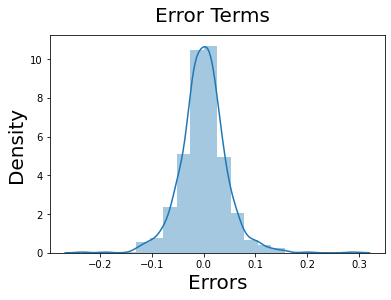

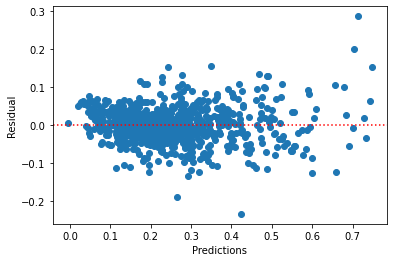

In [272]:
# Residual analysis
y_res_train = y_train - y_pred_train
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 20)
plt.ylabel('Density', fontsize = 20)

fig = plt.figure()
plt.scatter( y_pred_train , y_res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()


### Model Evaluation:

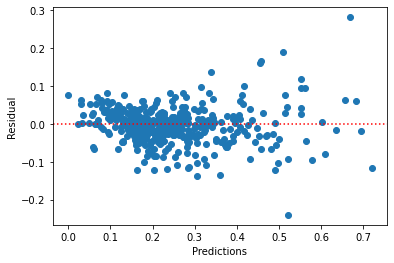

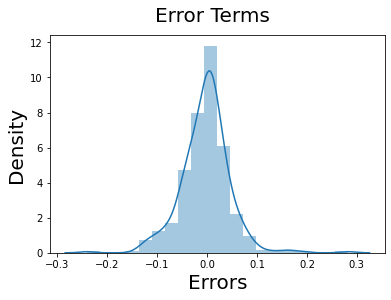

In [273]:
y_res_test = y_test - y_pred_test

plt.scatter( y_pred_test , y_res_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

fig = plt.figure()
sns.distplot(y_res_test, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.show()

## Ridge Regression

In [274]:
#Imprtin Libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [275]:
#Defining a list of alphas to tune
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge=Ridge()

#Defining folds for cross-validation
folds=5
ridge_model_cv=GridSearchCV(estimator=ridge,
                            param_grid=params,
                            scoring='neg_mean_absolute_error',
                            cv=folds,
                            return_train_score=True,
                            verbose=1)
ridge_model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [276]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=2.0)

In [277]:

# check the coefficient values with lambda = 2

alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)

Ridge(alpha=2.0)

In [278]:
# Coefficients list
ridge_parameters = list(ridge.coef_)
# Inserting Y Intercept to model parameters list
ridge_parameters.insert(0, ridge.intercept_)
# Rounding off the coefficients
ridge_parameters = [round(i,3) for i in ridge_parameters]

cols = X_train_rfe.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, ridge_parameters))
ridge_param_list

[('constant', 0.015),
 ('LotArea', 0.079),
 ('BsmtFinSF1', 0.142),
 ('BsmtFinSF2', 0.025),
 ('BsmtUnfSF', 0.05),
 ('TotalBsmtSF', 0.137),
 ('2ndFlrSF', 0.09),
 ('FullBath', 0.058),
 ('TotRmsAbvGrd', 0.081),
 ('Fireplaces', 0.049),
 ('GarageArea', 0.098),
 ('HouseAge', -0.103),
 ('MSSubClass_2-1/2 STORY ALL AGES', 0.035),
 ('MSSubClass_DUPLEX - ALL STYLES AND AGES', -0.024),
 ('Neighborhood_Crawfor', 0.06),
 ('Neighborhood_NoRidge', 0.054),
 ('Neighborhood_StoneBr', 0.044),
 ('BldgType_Duplex', -0.024),
 ('OverallQual_Excellent', 0.16),
 ('OverallQual_Very Excellent', 0.182),
 ('OverallQual_Very Good', 0.063),
 ('OverallCond_Excellent', 0.036),
 ('Exterior1st_AsphShn', 0.022),
 ('SaleType_Con', 0.043),
 ('SaleType_New', 0.053),
 ('SaleCondition_Alloca', 0.028)]

In [279]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
14,2.0,-0.031906,-0.033309,1
13,1.0,-0.031785,-0.033356,2
12,0.9,-0.031776,-0.033380,3
15,3.0,-0.032074,-0.033385,4
11,0.8,-0.031767,-0.033404,5
10,0.7,-0.031762,-0.033430,6
9,0.6,-0.031759,-0.033456,7
16,4.0,-0.032246,-0.033483,8
8,0.5,-0.031757,-0.033484,9
7,0.4,-0.031756,-0.033513,10


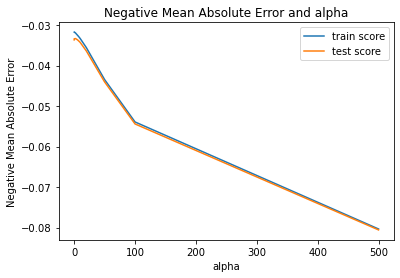

In [280]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [281]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

print('For Training Set....')
CalculatingValues(y_train,y_pred_train)
print()
print('For Test Set...')
CalculatingValues(y_test,y_pred_test)

For Training Set....
r2 value is:
0.8835070108539684
rss value is:
1.9511584032284153
rmse value is:
0.001957029491703526

For Test Set...
r2 value is:
0.8640624854394581
rss value is:
1.019282470911995
rmse value is:
0.001957029491703526


### Residual Analysis:

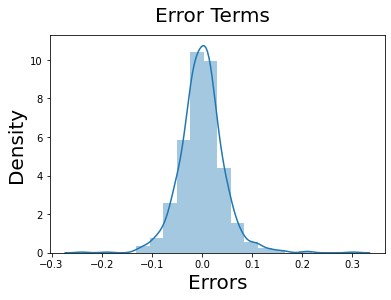

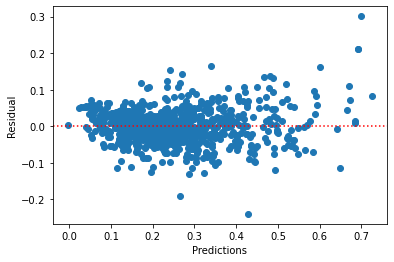

In [282]:
# Residual analysis
y_res_train = y_train - y_pred_train
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 20)
plt.ylabel('Density', fontsize = 20)

fig = plt.figure()
plt.scatter( y_pred_train , y_res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()


### Model Evaluation:

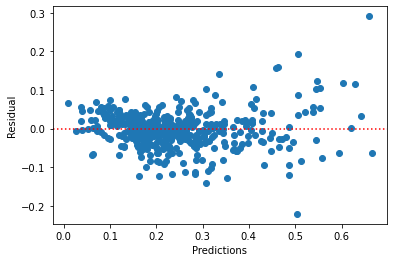

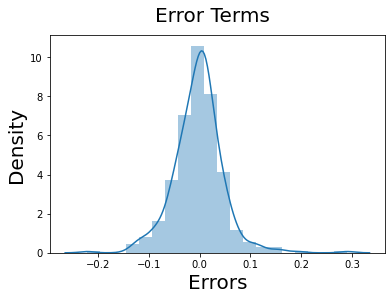

In [283]:
y_res_test = y_test - y_pred_test

plt.scatter( y_pred_test , y_res_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

fig = plt.figure()
sns.distplot(y_res_test, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.show()

## Lasso Regression

In [284]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [285]:
# get the best estimator for lambda

model_cv.best_estimator_

Lasso(alpha=0.0004)

In [286]:
# Instantiate Lasso regression with alpha=0.0004
lasso = Lasso(0.0004)
# Fitting the model with the train set
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0004)

In [287]:
# Coefficients list
lasso_parameters = list(lasso.coef_)
# Inserting Y Intercept to model parameters list
lasso_parameters.insert(0, lasso.intercept_)
# Rounding off the coefficients
lasso_parameters = [round(i,3) for i in lasso_parameters]

cols = X_train_rfe.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, lasso_parameters))
lasso_param_list

[('constant', 0.019),
 ('LotArea', 0.064),
 ('BsmtFinSF1', 0.088),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.219),
 ('2ndFlrSF', 0.094),
 ('FullBath', 0.052),
 ('TotRmsAbvGrd', 0.078),
 ('Fireplaces', 0.05),
 ('GarageArea', 0.1),
 ('HouseAge', -0.097),
 ('MSSubClass_2-1/2 STORY ALL AGES', 0.0),
 ('MSSubClass_DUPLEX - ALL STYLES AND AGES', -0.032),
 ('Neighborhood_Crawfor', 0.052),
 ('Neighborhood_NoRidge', 0.04),
 ('Neighborhood_StoneBr', 0.024),
 ('BldgType_Duplex', -0.0),
 ('OverallQual_Excellent', 0.163),
 ('OverallQual_Very Excellent', 0.193),
 ('OverallQual_Very Good', 0.066),
 ('OverallCond_Excellent', 0.009),
 ('Exterior1st_AsphShn', 0.0),
 ('SaleType_Con', 0.0),
 ('SaleType_New', 0.049),
 ('SaleCondition_Alloca', 0.0)]

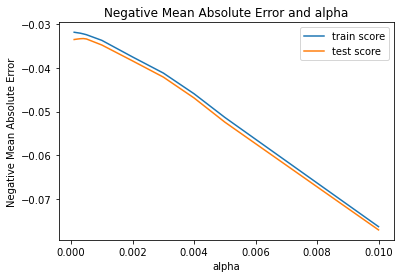

In [288]:
# plotting mean test and train scoes with alpha 

lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [289]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

print('For Training Set....')
CalculatingValues(y_train,y_pred_train)
print()
print('For Test Set...')
CalculatingValues(y_test,y_pred_test)

For Training Set....
r2 value is:
0.8790715479654174
rss value is:
2.0254486309120345
rmse value is:
0.0020315432606941167

For Test Set...
r2 value is:
0.863905595735106
rss value is:
1.0204588564449333
rmse value is:
0.0020315432606941167


### Residual Analysis:

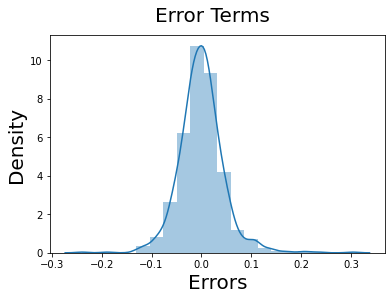

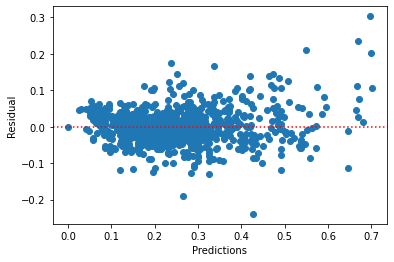

In [290]:
# Residual analysis
y_res_train = y_train - y_pred_train
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 20)
plt.ylabel('Density', fontsize = 20)

fig = plt.figure()
plt.scatter( y_pred_train , y_res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Model Evaluation:

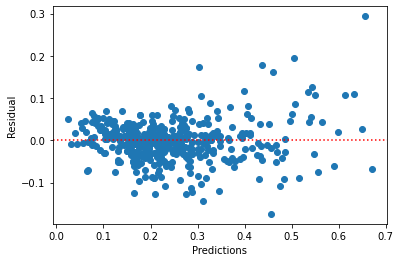

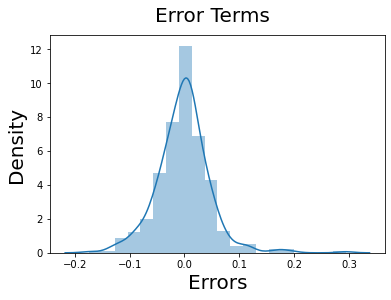

In [291]:
y_res_test = y_test - y_pred_test

plt.scatter( y_pred_test , y_res_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

fig = plt.figure()
sns.distplot(y_res_test, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.show()

## Consolidated Results:

Let's Compare all the coefficients that we obtained from the three models:

In [292]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Linear'] = lm1.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)

beta0 = pd.DataFrame(index=['constant'])
beta0['Linear'] = lm1.intercept_
beta0['Ridge'] = ridge.intercept_
beta0['Lasso'] = lasso.intercept_
new_df = beta0.append(betas)
new_df

,Linear,Ridge,Lasso
constant,1.449392e-02,0.014799,0.019395
LotArea,8.910061e-02,0.078549,0.064016
BsmtFinSF1,-5.568232e+12,0.142081,0.087999
BsmtFinSF2,-2.473639e+12,0.025259,0.000000
BsmtUnfSF,-5.206857e+12,0.049643,0.000000
TotalBsmtSF,8.143667e+12,0.136561,0.219041
2ndFlrSF,9.997559e-02,0.090042,0.094300
FullBath,5.529785e-02,0.058274,0.051902
TotRmsAbvGrd,6.591797e-02,0.080945,0.077870
Fireplaces,4.150391e-02,0.048676,0.050324


Lets comare the metrics values for all the three models:

In [293]:
def CalculatingMetrics(y, y_pred):
    metric = []
    r2_lr = r2_score(y, y_pred)
    metric.append(r2_lr)

    rss_lr = np.sum(np.square(y - y_pred))
    metric.append(rss_lr)

    mse_lr = mean_squared_error(y_train, y_pred_train)
    metric.append(mse_lr**0.5)
    return(metric)

new_df = pd.DataFrame(columns=['r2_score','rss','rmse'])
for x in [lm1,ridge,lasso]:
    y_pred_train_lr = x.predict(X_train_rfe)
    y_pred_test_lr = x.predict(X_test_rfe)
    a = CalculatingMetrics(y_train,y_pred_train_lr)
    new_df.loc[len(new_df)] = a
    b = CalculatingMetrics(y_test,y_pred_test_lr)
    new_df.loc[len(new_df)] = b

new_df['Models'] = ['Linear_Train','Linear_Test','Ridge_Train','Ridge_Test','Lasso_Train','Lasso_Test']
new_df.set_index('Models',inplace=True)
new_df

,r2_score,rss,rmse
Models,,,
Linear_Train,0.885430,1.918958,0.045073
Linear_Test,0.863485,1.023612,0.045073
Ridge_Train,0.883507,1.951158,0.045073
Ridge_Test,0.864062,1.019282,0.045073
Lasso_Train,0.879072,2.025449,0.045073
Lasso_Test,0.863906,1.020459,0.045073


## Conclusion:

The features most important for house price prediction selected by Lasso Regression are:
 - LotArea 
 - BsmtFinSF1
 - TotalBsmtSF
 - 2ndFlrSF 
 - FullBath 
 - TotRmsAbvGrd 
 - Fireplaces 
 - GarageArea 
 - HouseAge 
 - MSSubClass_DUPLEX - ALL STYLES AND AGES 
 - Neighborhood_Crawfor 
 - Neighborhood_NoRidge 
 - Neighborhood_StoneBr 
 - BldgType_Duplex 
 - OverallQual_Excellent 
 - OverallQual_Very Excellent 
 - OverallQual_Very Good 
 - OverallCond_Excellent 
 - SaleType_New 

The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 2.0
Lasso - 0.0004

Also, Lasso helped in feature reduction, coefficient value of few of the features became 0.

## Assignment:

We are removing the 5 most important predictors and building the model once again.

In [300]:
X_train1 = X_train_rfe.drop(['TotalBsmtSF','OverallQual_Very Excellent','OverallQual_Excellent','GarageArea','2ndFlrSF'],axis=1)

In [301]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [302]:

ridge_model_cv.best_estimator_

Ridge(alpha=2.0)

In [303]:
# Instantiate Lasso regression with alpha=0.0004
lasso = Lasso(2.0)
# Fitting the model with the train set
lasso.fit(X_train1, y_train)

Lasso(alpha=2.0)

In [304]:
# Coefficients list
lasso_parameters = list(lasso.coef_)
# Inserting Y Intercept to model parameters list
lasso_parameters.insert(0, lasso.intercept_)
# Rounding off the coefficients
lasso_parameters = [i for i in lasso_parameters]

cols = X_train_rfe.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, lasso_parameters))
lasso_param_list

[('constant', 0.24300954411481432),
 ('LotArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('FullBath', 0.0),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', -0.0),
 ('HouseAge', 0.0),
 ('MSSubClass_2-1/2 STORY ALL AGES', 0.0),
 ('MSSubClass_DUPLEX - ALL STYLES AND AGES', 0.0),
 ('Neighborhood_Crawfor', -0.0),
 ('Neighborhood_NoRidge', 0.0),
 ('Neighborhood_StoneBr', 0.0),
 ('BldgType_Duplex', -0.0),
 ('OverallQual_Excellent', 0.0),
 ('OverallQual_Very Excellent', 0.0),
 ('OverallQual_Very Good', -0.0)]

In [305]:
y_pred_train = lasso.predict(X_train1)
#y_pred_test = lasso.predict(X_test1)

print('For Training Set....')
CalculatingValues(y_train,y_pred_train)

For Training Set....
r2 value is:
0.0
rss value is:
16.74914874733372
rmse value is:
0.016799547389502227
